## Datos Lenguas Andinas

In [13]:
## juntemos todo en una sola función :)
import pandas as pd

def read_lenguas_andinas(file, names, dominio_num):
    
    ## leemos los datos
    ## rasgos!
    datos_lenguas = pd.read_csv(file,sep=';')
    ## nombre lenguas!
    lenguas_areas = pd.read_csv(names,sep=';',encoding='utf-8')
    lenguas_areas = lenguas_areas.rename(columns={'ï»¿Correlativo':'Correlativo', 'Nombre Lengua':'Nombre Lengua', 'RegiÃ³n Lengua':'Región Lengua', 'PaÃ­s':'País',
       'Coordenadas GeogrÃ¡ficas':'Coordenadas Geográficas', 'GlottoCode':'GlottoCode', 'IsoCode':'IsoCode'})
    lenguas_areas = lenguas_areas[['Correlativo','Nombre Lengua']]
    ## creamos un diccionario numero:nombre
    numero = [num for num in lenguas_areas['Correlativo']]
    nombre = [area for area in lenguas_areas['Nombre Lengua']]
    numero_nombre = [[numero[i],nombre[i]] for i in range(len(numero))]
    numero_nombre = {item[0]:item[1] for item in numero_nombre}
    ## ahora filtramos por dominio (no es estrictamente necesario, igual prefiero hacerlo)
    dominio = datos_lenguas[datos_lenguas['Dominio']==dominio_num]
    ## lenguas con anotación en este dominio
    datos_lenguas = [lengua for lengua in dominio['Lengua']]
    lenguas = []
    
    ## valores únicos de lenguas
    for lengua in datos_lenguas:
        if lengua not in lenguas:
            lenguas = lenguas + [lengua]
    
    ## diccionario para guardar los datos
    D = {lengua:{} for lengua in lenguas}
    
    ## recorremos usando loc :)
    for i in list(dominio.index):
        ## cambiamos el nombre de los rasgos para que incluyan información del dominio
        D[dominio.loc[i,'Lengua']][str(dominio_num)+'_'+str(dominio.loc[i,'TipoRasgo'])]=dominio.loc[i,'ValorRasgo']
    
    return {numero_nombre[key].lower():D[key] for key in D.keys()} ## diccionario!

In [14]:
D=read_lenguas_andinas('TabladeDatos.csv','andean languages.csv',4)

In [15]:
D

{'mapudungun': {'4_2': 4, '4_3': 1, '4_4': 2, '4_1': 1},
 'ancash quechua': {'4_2': 4, '4_3': 1, '4_4': 2, '4_1': 1},
 'cajamarca quechua': {'4_2': 1, '4_3': 2, '4_4': 2, '4_1': 2},
 'ecuadorian quechua': {'4_2': 1, '4_3': 1, '4_4': 2, '4_1': 2},
 'ayacucho quechua': {'4_2': 1, '4_3': 2, '4_4': 2, '4_1': 2},
 'aymara': {'4_2': 1, '4_3': 2, '4_4': 1, '4_1': 2},
 'jaqaru': {'4_2': 1, '4_3': 2, '4_4': 2, '4_1': 2},
 'chipaya': {'4_2': 1, '4_3': 1, '4_4': 1, '4_1': 2},
 'uchumataqu': {'4_2': 1, '4_3': 1, '4_1': 2},
 'cholon': {'4_2': 2, '4_3': 1, '4_4': 2, '4_1': 1},
 'mochica': {'4_2': 1, '4_4': 2, '4_1': 2},
 'kunza': {'4_2': 4, '4_3': 1, '4_4': 2, '4_1': 1},
 'millcayac': {'4_2': 4, '4_3': 2, '4_4': 1, '4_1': 1},
 'allentiac': {'4_2': 1, '4_3': 1, '4_4': 2, '4_1': 2},
 'selknam': {'4_2': 2, '4_3': 2, '4_4': 2, '4_1': 3},
 'yahgan': {'4_2': 1, '4_3': 1, '4_1': 2},
 'pilaga': {'4_2': 3, '4_3': 1, '4_1': 1},
 'wichi': {'4_2': 9, '4_3': 1, '4_4': 1, '4_1': 1},
 'ayoreo': {'4_2': 1, '4_3': 1

In [16]:
len(D)

56

In [17]:
for key in D.keys():
    print(key,len(D[key]))

mapudungun 4
ancash quechua 4
cajamarca quechua 4
ecuadorian quechua 4
ayacucho quechua 4
aymara 4
jaqaru 4
chipaya 4
uchumataqu 3
cholon 4
mochica 3
kunza 4
millcayac 4
allentiac 4
selknam 4
yahgan 3
pilaga 3
wichi 4
ayoreo 4
tapiete 4
kawesqar 3
tehuelche 4
secoya 4
urarina 4
yanesha 4
tariana 4
tucano 4
yauyos quechua 4
puquina 4
lule 4
vilela 4
santiago del estero quechua 4
pacaraos quechua 4
kokama 4
gaviao 4
tiriyo 4
kalapalo 4
karaja 4
apinaye 4
kashibo-kakataibo 4
matses 4
shiwilu 4
cavineña 4
sanuma 4
hup 4
kulina 4
bora 4
trumai 4
yurakare 4
movima 4
puinave 4
sabane 4
aguaruna 4
kwaza 4
kakua 4
moseten 4


### mapas

In [21]:
import pandas as pd

lenguas_glotto = pd.read_csv('andean languages.csv',sep=';',encoding='cp1252')
lenguas_glotto = lenguas_glotto.rename(columns={'ï»¿Correlativo':'Correlativo', 'Nombre Lengua':'Nombre Lengua', 'RegiÃ³n Lengua':'Región Lengua', 'PaÃ­s':'País',
       'Coordenadas GeogrÃ¡ficas':'Coordenadas Geográficas', 'GlottoCode':'GlottoCode', 'IsoCode':'IsoCode'})

In [22]:
lenguas_glotto

Correlativo                Nombre Lengua Región Lengua  \
0             1                   Mapudungun         Andes   
1             2               Ancash Quechua         Andes   
2             3            Cajamarca Quechua         Andes   
3             4           Ecuadorian Quechua         Andes   
4             5             Ayacucho Quechua         Andes   
5             7                       Aymara         Andes   
6             8                       Jaqaru         Andes   
7             9                      Chipaya         Andes   
8            10                   Uchumataqu         Andes   
9            11                       Cholon         Andes   
10           12                      Mochica         Andes   
11           13                        Kunza         Andes   
12           14                    Millcayac         Andes   
13           15                    Allentiac         Andes   
14           16                      Selknam     Patagonia   
15           17                       Yahgan     Patagonia   
16           21                       Pilaga         Chaco   
17           23                        Wichi         Chaco   
18           25                       Ayoreo         Chaco   
19           26                      Tapiete         Chaco   
20           27                     Kawesqar     Patagonia   
21           28                    Tehuelche     Patagonia   
22           29                       Secoya      Amazonia   
23           30                      Urarina      Amazonia   
24           35                      Yanesha      Amazonia   
25           36                      Tariana      Amazonia   
26           37                       Tucano      Amazonia   
27           39               Yauyos Quechua         Andes   
28           41                      Puquina         Andes   
29           42                         Lule         Chaco   
30           43                       Vilela         Chaco   
31           44  Santiago del Estero Quechua         Andes   
32           45             Pacaraos Quechua         Andes   
33           46                       kokama      Amazonia   
34           47                       Gaviao      Amazonia   
35           48                       Tiriyo      Amazonia   
36           49                     kalapalo      Amazonia   
37           50                       Karaja      Amazonia   
38           51                      Apinaye      Amazonia   
39           52            Kashibo-Kakataibo      Amazonia   
40           53                       Matses      Amazonia   
41           54                      Shiwilu      Amazonia   
42           55                    CavineÃ±a      Amazonia   
43           56                       Sanuma      Amazonia   
44           57                          Hup      Amazonia   
45           58                       kulina      Amazonia   
46           59                         Bora      Amazonia   
47           61                       Trumai      Amazonia   
48           63                     Yurakare      Amazonia   
49           64                       Movima      Amazonia   
50           65                      Puinave      Amazonia   
51           71                       Sabane      Amazonia   
52           72                     aguaruna      Amazonia   
53           74                        Kwaza      Amazonia   
54           75                        Kakua      Amazonia   
55           76                      Moseten      Amazonia   

                    País Coordenadas Geográficas GlottoCode IsoCode  
0                  Chile         -38.74 / -71.28   mapu1245     arn  
1                 Varios           3.90 / -51.80   huay1240     qwh  
2                  PerÃº          -7.09 / -78.32   caja1238     qvc  
3                Ecuador          -6.56 / -43.00   ecua1249     NaN  
4                  PerÃº         -13.85 / -74.32   ayac1239     quy  
5                  PerÃº         -17.14 / -70.34 

In [23]:
changes = {'amar1274':'hara1260','trio1238':'kawe1237','alac1240':'tiri1260','wich1264':'wich1261'}
for code in changes.keys():
    lenguas_glotto.loc[(lenguas_glotto.GlottoCode == code),'GlottoCode']=changes[code]

In [24]:
glotto_coordinates = dict(zip([name.lower() for name in lenguas_glotto['GlottoCode']],lenguas_glotto['Coordenadas Geográficas']))

In [25]:
glotto_coordinates = {key:glotto_coordinates[key].split(' / ') for key in glotto_coordinates.keys()}

In [26]:
glotto_coordinates

{'mapu1245': ['-38.74', '-71.28'],
 'huay1240': ['3.90', '-51.80'],
 'caja1238': ['-7.09', '-78.32'],
 'ecua1249': ['-6.56', '-43.00'],
 'ayac1239': ['-13.85', '-74.32'],
 'sout2996': ['-17.14', '-70.34'],
 'jaqa1244': ['-12.74', '-75.81'],
 'chip1262': ['-18.74', '-67.90'],
 'uruu1244': ['-16.73', '-68.97'],
 'chol1284': ['-9.23', '-75.96'],
 'moch1259': ['-8.02', '-79.00'],
 'kunz1244': ['-23.00', '-69.00'],
 'mill1237': ['3.11', '-66.24'],
 'alle1238': ['-6.68', '-73.24'],
 'onaa1245': ['-54.00', '-68.50'],
 'yama1264': ['/'],
 'pila1245': ['-25.01', '-60.15'],
 'wich1261': ['-23.16', '-62.18'],
 'ayor1240': ['-19.22', '-60.22'],
 'tapi1253': ['-21.42', '-62.68'],
 'kawe1237': ['-53.44', '-71.04'],
 'tehu1242': ['-47.58', '-68.32'],
 'seco1241': ['-0.46', '-75.55'],
 'urar1246': ['-4.44', '-75.42'],
 'yane1238': ['-10.55', '-75.31'],
 'tari1256': ['0.44', '-68.90'],
 'tuca1252': ['0.58', '-69.58'],
 'yauy1235': ['-13.11', '-75.77'],
 'puqu1242': ['-15.90', '-69.96'],
 'lule1238': ['

In [27]:
lenguas_glotto = dict(zip([name.lower() for name in lenguas_glotto['Nombre Lengua']],lenguas_glotto['GlottoCode']))

In [28]:
lenguas_glotto = {key:lenguas_glotto[key] for key in lenguas_glotto.keys() if key in D.keys()}

In [29]:
len(lenguas_glotto)

56

In [30]:
lenguas_glotto

{'mapudungun': 'mapu1245',
 'ancash quechua': 'huay1240',
 'cajamarca quechua': 'caja1238',
 'ecuadorian quechua': 'ecua1249',
 'ayacucho quechua': 'ayac1239',
 'aymara': 'sout2996',
 'jaqaru': 'jaqa1244',
 'chipaya': 'chip1262',
 'uchumataqu': 'uruu1244',
 'cholon': 'chol1284',
 'mochica': 'moch1259',
 'kunza': 'kunz1244',
 'millcayac': 'mill1237',
 'allentiac': 'alle1238',
 'selknam': 'onaa1245',
 'yahgan': 'yama1264',
 'pilaga': 'pila1245',
 'wichi': 'wich1261',
 'ayoreo': 'ayor1240',
 'tapiete': 'tapi1253',
 'kawesqar': 'kawe1237',
 'tehuelche': 'tehu1242',
 'secoya': 'seco1241',
 'urarina': 'urar1246',
 'yanesha': 'yane1238',
 'tariana': 'tari1256',
 'tucano': 'tuca1252',
 'yauyos quechua': 'yauy1235',
 'puquina': 'puqu1242',
 'lule': 'lule1238',
 'vilela': 'vile1241',
 'santiago del estero quechua': 'sant1432',
 'pacaraos quechua': 'paca1245',
 'kokama': 'coca1259',
 'gaviao': 'gavi1246',
 'tiriyo': 'tiri1260',
 'kalapalo': 'kuik1246',
 'karaja': 'kara1500',
 'apinaye': 'apin1244

In [31]:
## miramos languoids

languoid = pd.read_csv('languoid.csv',sep=',')

In [32]:
languoid = languoid[languoid['id'].isin(lenguas_glotto.values())]

In [33]:
languoid

id family_id parent_id                              name  \
244    agua1253  jiva1245  jiva1245                          Aguaruna   
480    alle1238  huar1251  huar1251                         Allentiac   
840    apin1244  nucl1710  core1264                           Apinayé   
1307   ayac1239  quec1387  ayac1238                  Ayacucho Quechua   
1326   ayor1240  zamu1243  zamu1244                            Ayoreo   
2822   bora1263  bora1262  bora1262                              Bora   
3298   cacu1241  kaku1242  kaku1242                             Kakua   
3320   caja1238  quec1387  caja1240                 Cajamarca Quechua   
3433   cash1251  pano1259  main1279                 Cashibo-Cacataibo   
3464   cavi1250  pano1259  taca1255                          Cavineña   
4051   chip1262  uruc1242  uruc1242                           Chipaya   
4107   chol1284  hibi1242  hibi1242                            Cholón   
4275   coca1259  tupi1275  omag1247                  Cocama-Cocamilla   
4428   culi1244  araw1282  madi1263                            Culina   
5748   ecua1249  quec1387  colo1257              Ecuadorian Quechua B   
6564   gavi1246  tupi1275  gavi1248                Gavião Do Jiparaná   
7829   huay1240  quec1387  huay1239            Huaylas Ancash Quechua   
7888   hupd1244  nada1235  hupy1235                               Hup   
8542   jaqa1244  ayma1253  tupe1234                            Jaqaru   
8589   jebe1250  cahu1265  cahu1265                            Jebero   
9377   kara1500  nucl1710  nucl1710                            Karajá   
9572   kawe1237       NaN       NaN                          Kawesqar   
10671  kuik1246  cari1283  nucl1656                  Kuikúro-Kalapálo   
10816  kunz1244       NaN       NaN                             Kunza   
10987  kwaz1243       NaN       NaN                             Kwaza   
12084  lule1238       NaN       NaN                              Lule   
12867  mapu1245  arau1255  arau1255                        Mapudungun   
13132  mats1244  pano1259  mats1243                            Matsés   
13651  mill1237  huar1251  huar1251                         Millcayac   
13835  moch1259       NaN       NaN                           Mochica   
14081  mose1249       NaN       NaN                   Mosetén-Chimané   
14112  movi1243       NaN       NaN                            Movima   
17056  onaa1245  chon1288  insu1253                          Selk'nam   
17296  paca1245  quec1387  quec1386                  Pacaraos Quechua   
17909  pila1245  guai1249  pila1244                            Pilagá   
18186  puin1248       NaN       NaN                           Puinave   
18240  puqu1242       NaN       NaN                           Puquina   
18835  saba1268  namb1299  namb1299                            Sabanê   
19221  sant1432  quec1387  boli1262       Santiago del Estero Quichua   
19251  sanu1240  yano1268  yano1268                            Sanumá   
19441  seco1241  tuca1253  sion1248                            Secoya   
20639  sout2996  ayma1253  nucl1667                   Southern Aymara   
21559  tapi1253  tupi1275  chir1295                           Tapieté   
21584  tari1256  araw1281  bani1258                           Tariana   
21727  tehu1242  chon1288  cont1245                         Tehuelche   
22123  tiri1260  cari1283  tara1324                          Tiriyoan   
22441  trum1247       NaN       NaN                            Trumai   
22523  tuca1252  tuca1253  east2707                            Tucano   
23162  urar1246       NaN       NaN                           Urarina   
23212  uruu1244  uruc1242  uruc1242                               Uru   
23422  vile1241       NaN       NaN                            Vilela   
24412  wich1261  mata1289  mata1291                             Wichi   
24783  yama1264       NaN       NaN                            Yámana   
24825  yane1238  araw1281  kamp1244                          Yanesha'  

In [34]:
len(languoid)

56

In [35]:
for i in languoid.index:
    if languoid.isnull().loc[i,'latitude']:
        code=languoid.loc[i,'id']
        print(code)
        if glotto_coordinates[code][0]!='/':
            languoid.at[i, 'latitude'] = glotto_coordinates[code][0]
            languoid.at[i, 'longitude'] = glotto_coordinates[code][1]

ecua1249
kawe1237
tiri1260
wich1261


In [36]:
languoid

id family_id parent_id                              name  \
244    agua1253  jiva1245  jiva1245                          Aguaruna   
480    alle1238  huar1251  huar1251                         Allentiac   
840    apin1244  nucl1710  core1264                           Apinayé   
1307   ayac1239  quec1387  ayac1238                  Ayacucho Quechua   
1326   ayor1240  zamu1243  zamu1244                            Ayoreo   
2822   bora1263  bora1262  bora1262                              Bora   
3298   cacu1241  kaku1242  kaku1242                             Kakua   
3320   caja1238  quec1387  caja1240                 Cajamarca Quechua   
3433   cash1251  pano1259  main1279                 Cashibo-Cacataibo   
3464   cavi1250  pano1259  taca1255                          Cavineña   
4051   chip1262  uruc1242  uruc1242                           Chipaya   
4107   chol1284  hibi1242  hibi1242                            Cholón   
4275   coca1259  tupi1275  omag1247                  Cocama-Cocamilla   
4428   culi1244  araw1282  madi1263                            Culina   
5748   ecua1249  quec1387  colo1257              Ecuadorian Quechua B   
6564   gavi1246  tupi1275  gavi1248                Gavião Do Jiparaná   
7829   huay1240  quec1387  huay1239            Huaylas Ancash Quechua   
7888   hupd1244  nada1235  hupy1235                               Hup   
8542   jaqa1244  ayma1253  tupe1234                            Jaqaru   
8589   jebe1250  cahu1265  cahu1265                            Jebero   
9377   kara1500  nucl1710  nucl1710                            Karajá   
9572   kawe1237       NaN       NaN                          Kawesqar   
10671  kuik1246  cari1283  nucl1656                  Kuikúro-Kalapálo   
10816  kunz1244       NaN       NaN                             Kunza   
10987  kwaz1243       NaN       NaN                             Kwaza   
12084  lule1238       NaN       NaN                              Lule   
12867  mapu1245  arau1255  arau1255                        Mapudungun   
13132  mats1244  pano1259  mats1243                            Matsés   
13651  mill1237  huar1251  huar1251                         Millcayac   
13835  moch1259       NaN       NaN                           Mochica   
14081  mose1249       NaN       NaN                   Mosetén-Chimané   
14112  movi1243       NaN       NaN                            Movima   
17056  onaa1245  chon1288  insu1253                          Selk'nam   
17296  paca1245  quec1387  quec1386                  Pacaraos Quechua   
17909  pila1245  guai1249  pila1244                            Pilagá   
18186  puin1248       NaN       NaN                           Puinave   
18240  puqu1242       NaN       NaN                           Puquina   
18835  saba1268  namb1299  namb1299                            Sabanê   
19221  sant1432  quec1387  boli1262       Santiago del Estero Quichua   
19251  sanu1240  yano1268  yano1268                            Sanumá   
19441  seco1241  tuca1253  sion1248                            Secoya   
20639  sout2996  ayma1253  nucl1667                   Southern Aymara   
21559  tapi1253  tupi1275  chir1295                           Tapieté   
21584  tari1256  araw1281  bani1258                           Tariana   
21727  tehu1242  chon1288  cont1245                         Tehuelche   
22123  tiri1260  cari1283  tara1324                          Tiriyoan   
22441  trum1247       NaN       NaN                            Trumai   
22523  tuca1252  tuca1253  east2707                            Tucano   
23162  urar1246       NaN       NaN                           Urarina   
23212  uruu1244  uruc1242  uruc1242                               Uru   
23422  vile1241       NaN       NaN                            Vilela   
24412  wich1261  mata1289  mata1291                             Wichi   
24783  yama1264       NaN       NaN                            Yámana   
24825  yane1238  araw1281  kamp1244                          Yanesha'  

In [37]:
!pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-snpzsfdw
     |████████████████████████████████| 14.8 MB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 6.4 MB 23.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 36.5 MB/s eta 0:00:01
  Created wheel for geopandas: filename=geopandas-0.8.0+73.g1ef9242-py2.py3-none-any.whl size=973544 sha256=35191cab41b5e44023b3d189d91844506bb3c1ca7be06d04e78db63acc604954
  Stored in directory: /tmp/pip-ephem-wheel-cache-6b15zuo9/wheels/e7/83/8b/b0820f79d4683dc1af4f6f664cbef2c55c612647f22abee7bc
Successfully built geopandas
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [38]:
!pip install descartes

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [39]:
import geopandas

In [40]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [41]:
world = world[world['continent']=='South America']

In [42]:
x, y, codes = languoid['longitude'].values, languoid['latitude'].values, languoid['id'].values

In [43]:
x

array([-77.9218  , -68.096924, -47.6315  , -74.32246 , -60.217495,
       -72.257066, -69.5659  , -78.3214  , -75.4206  , -66.6277  ,
       -67.89633 , -75.9621  , -74.      , -70.6648  , -43.      ,
       -61.6752  , -77.7768  , -69.8359  , -75.809231, -76.4103  ,
       -50.3492  , -71.04    , -53.2261  , -69.      , -61.1833  ,
       -61.887818, -71.277   , -72.6281  , -67.569581, -79.      ,
       -67.83756 , -65.6348  , -68.5     , -76.73046 , -60.1537  ,
       -67.6886  , -69.9611  , -60.335   , -63.2466  , -64.5     ,
       -75.5547  , -70.3442  , -62.684   , -68.9042  , -68.3235  ,
       -55.76    , -53.5717  , -69.5763  , -75.4211  , -68.97119 ,
       -58.9661  , -62.18    , -68.2648  , -75.315   , -75.7659  ,
       -65.1224  ])

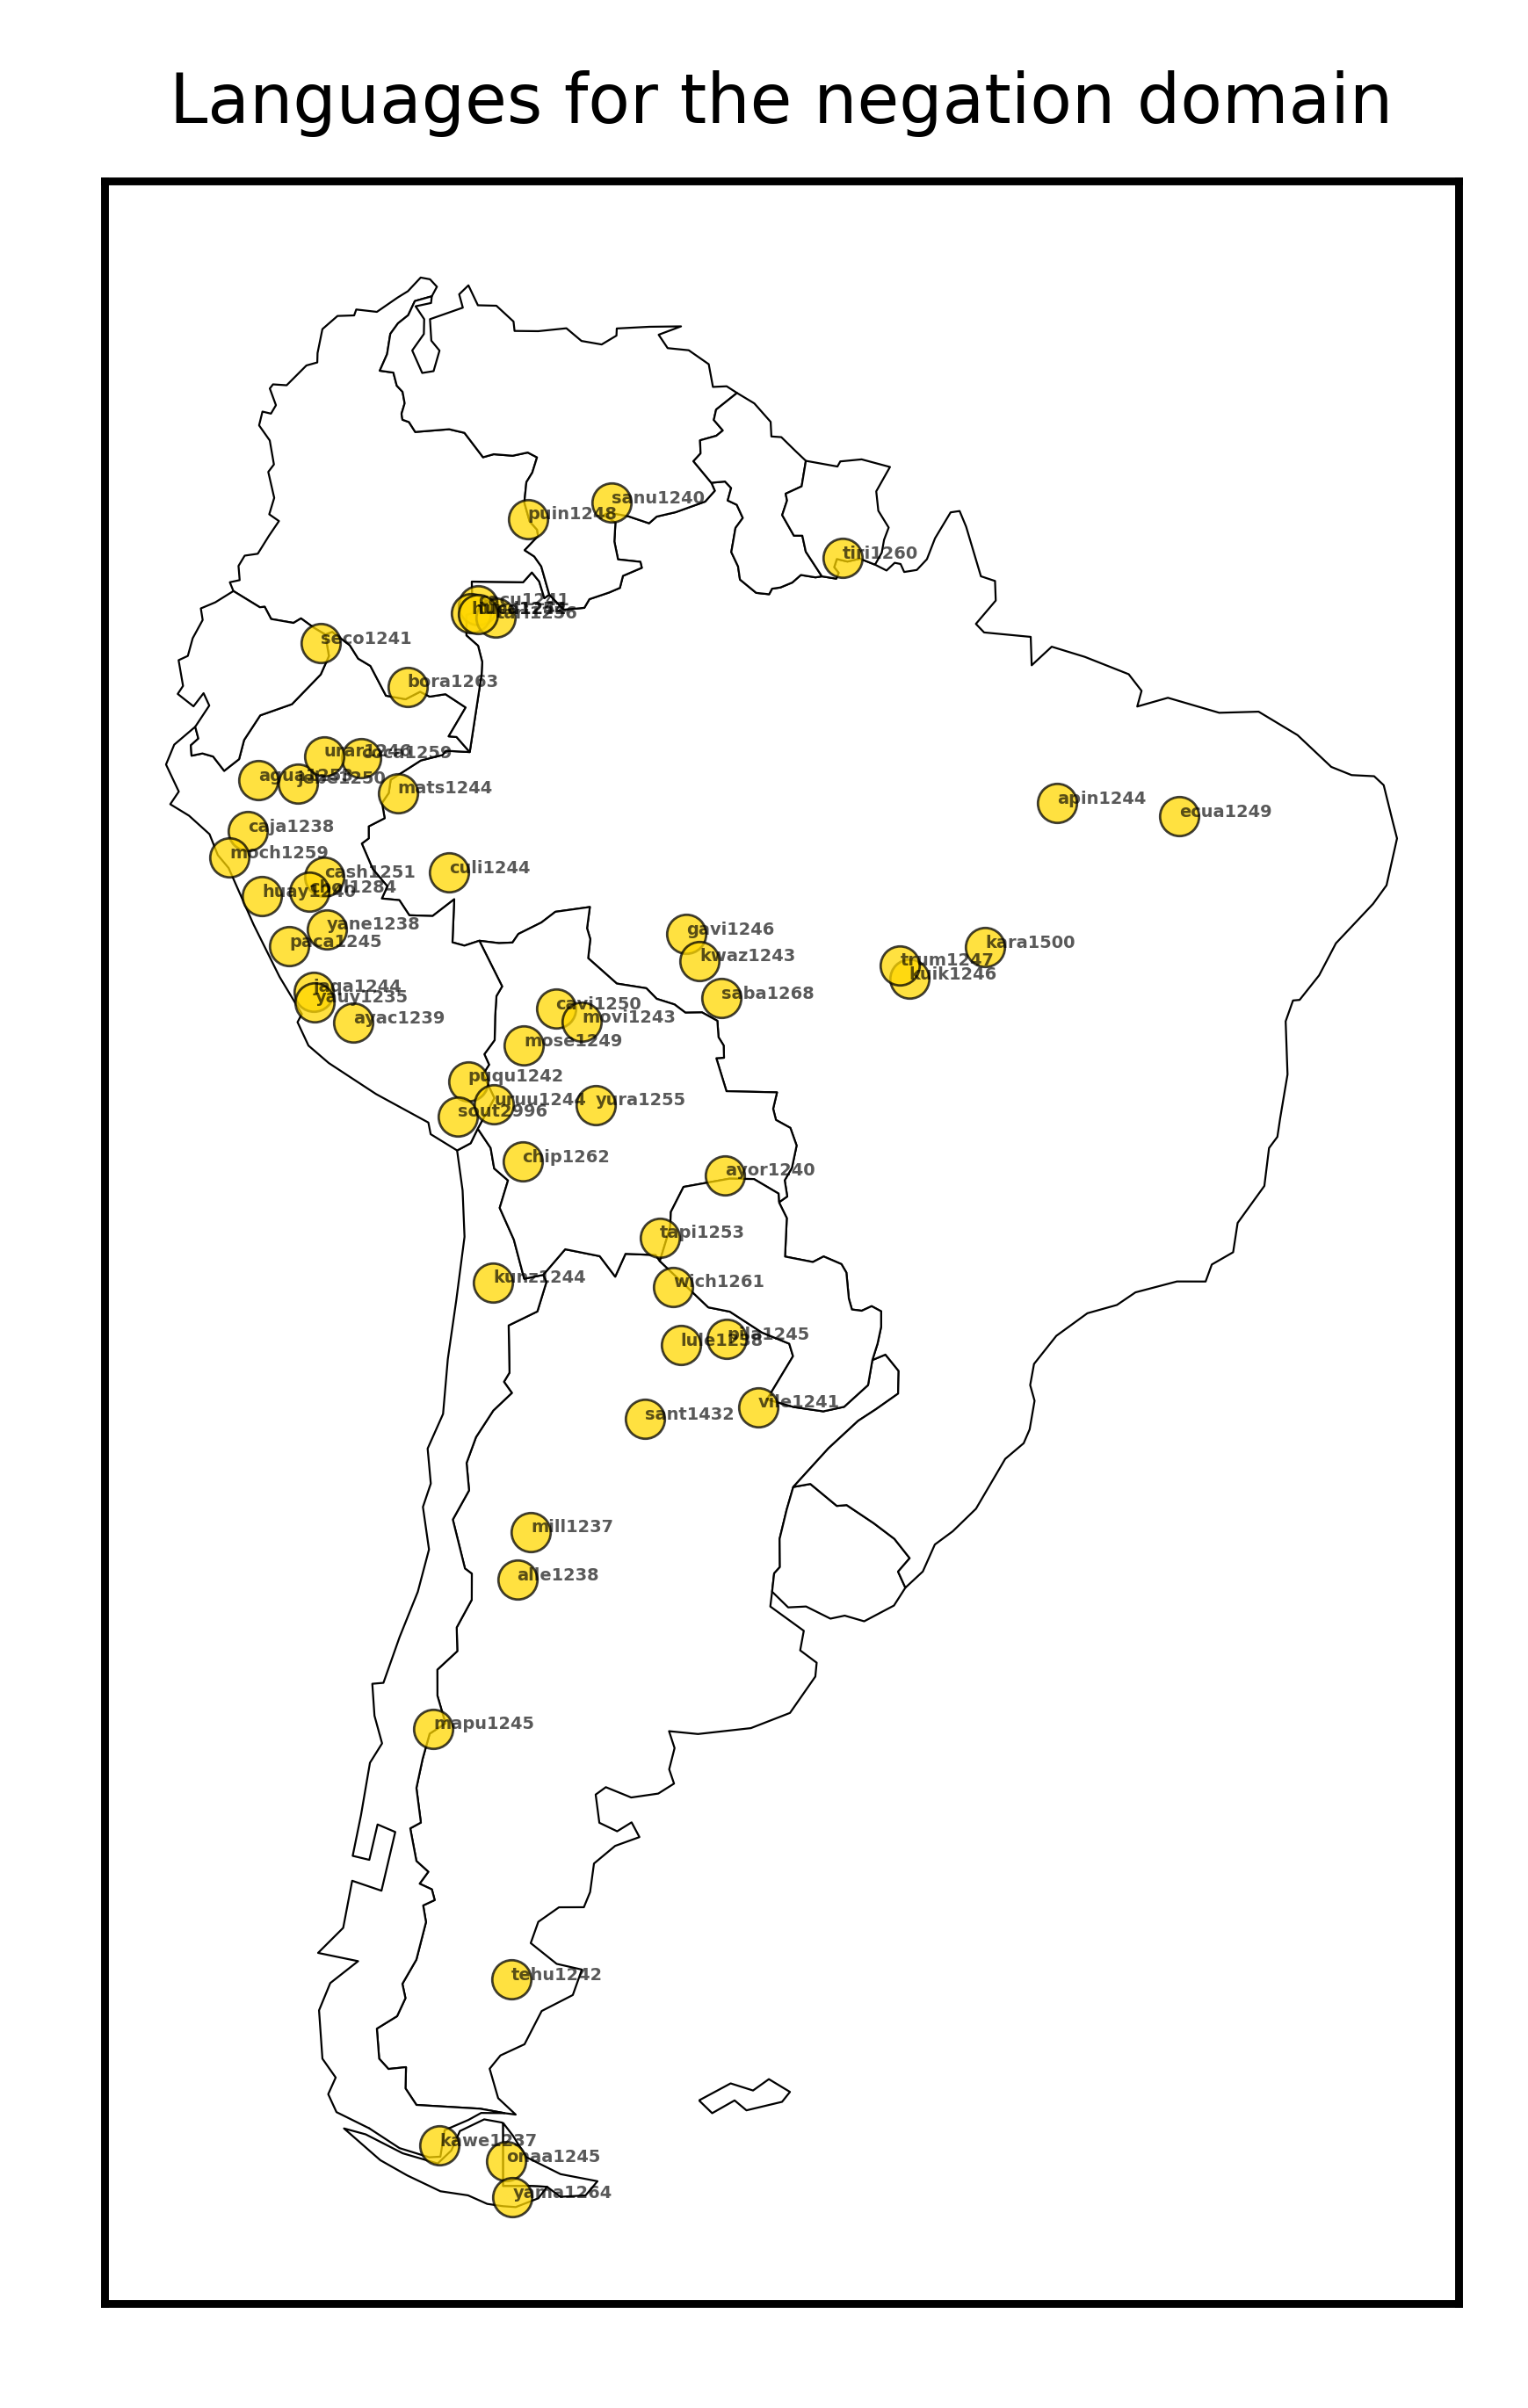

In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)

ax.set_aspect('equal')
plt.title('Languages for the negation domain',fontsize=7)
world.plot(ax=ax, color='white', edgecolor='black',linewidth=0.2)
#cities.plot(ax=ax, marker='o', color='red', markersize=5)
ax.plot(x, y, marker='o',color='gold',linewidth=0,markersize=4,markeredgewidth=0.25,markeredgecolor='k',alpha=0.75)
annotate = True
if annotate == True:
    for i in range(len(x)):
        ax.annotate(codes[i], weight='demi', color='k', xy=(x[i],y[i]), fontsize=1.75, alpha=0.65)
ax.set_yticks([])
ax.set_xticks([])
plt.savefig('maps/mapa'+str(annotate)+'.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [45]:
Dcodes = {lenguas_glotto[key]:D[key] for key in D.keys()}

In [46]:
rasgos = []

for key in Dcodes.keys():
    rasgos+=list(Dcodes[key].keys())
rasgos = list(set(rasgos))

In [47]:
rasgos

['4_3', '4_2', '4_4', '4_1']

In [48]:
def values_per_feature(DD,f):
    DDD = {}
    for key in DD.keys():
        if f in DD[key].keys():
            DDD[key]=DD[key][f]
    return DDD

In [49]:
values_per_feature(Dcodes,'4_4')

{'mapu1245': 2,
 'huay1240': 2,
 'caja1238': 2,
 'ecua1249': 2,
 'ayac1239': 2,
 'sout2996': 1,
 'jaqa1244': 2,
 'chip1262': 1,
 'chol1284': 2,
 'moch1259': 2,
 'kunz1244': 2,
 'mill1237': 1,
 'alle1238': 2,
 'onaa1245': 2,
 'wich1261': 1,
 'ayor1240': 1,
 'tapi1253': 2,
 'tehu1242': 2,
 'seco1241': 1,
 'urar1246': 2,
 'yane1238': 1,
 'tari1256': 2,
 'tuca1252': 2,
 'yauy1235': 2,
 'puqu1242': 2,
 'lule1238': 2,
 'vile1241': 2,
 'sant1432': 2,
 'paca1245': 2,
 'coca1259': 2,
 'gavi1246': 2,
 'tiri1260': 1,
 'kuik1246': 2,
 'kara1500': 1,
 'apin1244': 1,
 'cash1251': 1,
 'mats1244': 2,
 'jebe1250': 2,
 'cavi1250': 2,
 'sanu1240': 2,
 'hupd1244': 1,
 'culi1244': 1,
 'bora1263': 2,
 'trum1247': 1,
 'yura1255': 2,
 'movi1243': 2,
 'puin1248': 2,
 'saba1268': 1,
 'agua1253': 2,
 'kwaz1243': 1,
 'cacu1241': 2,
 'mose1249': 1}

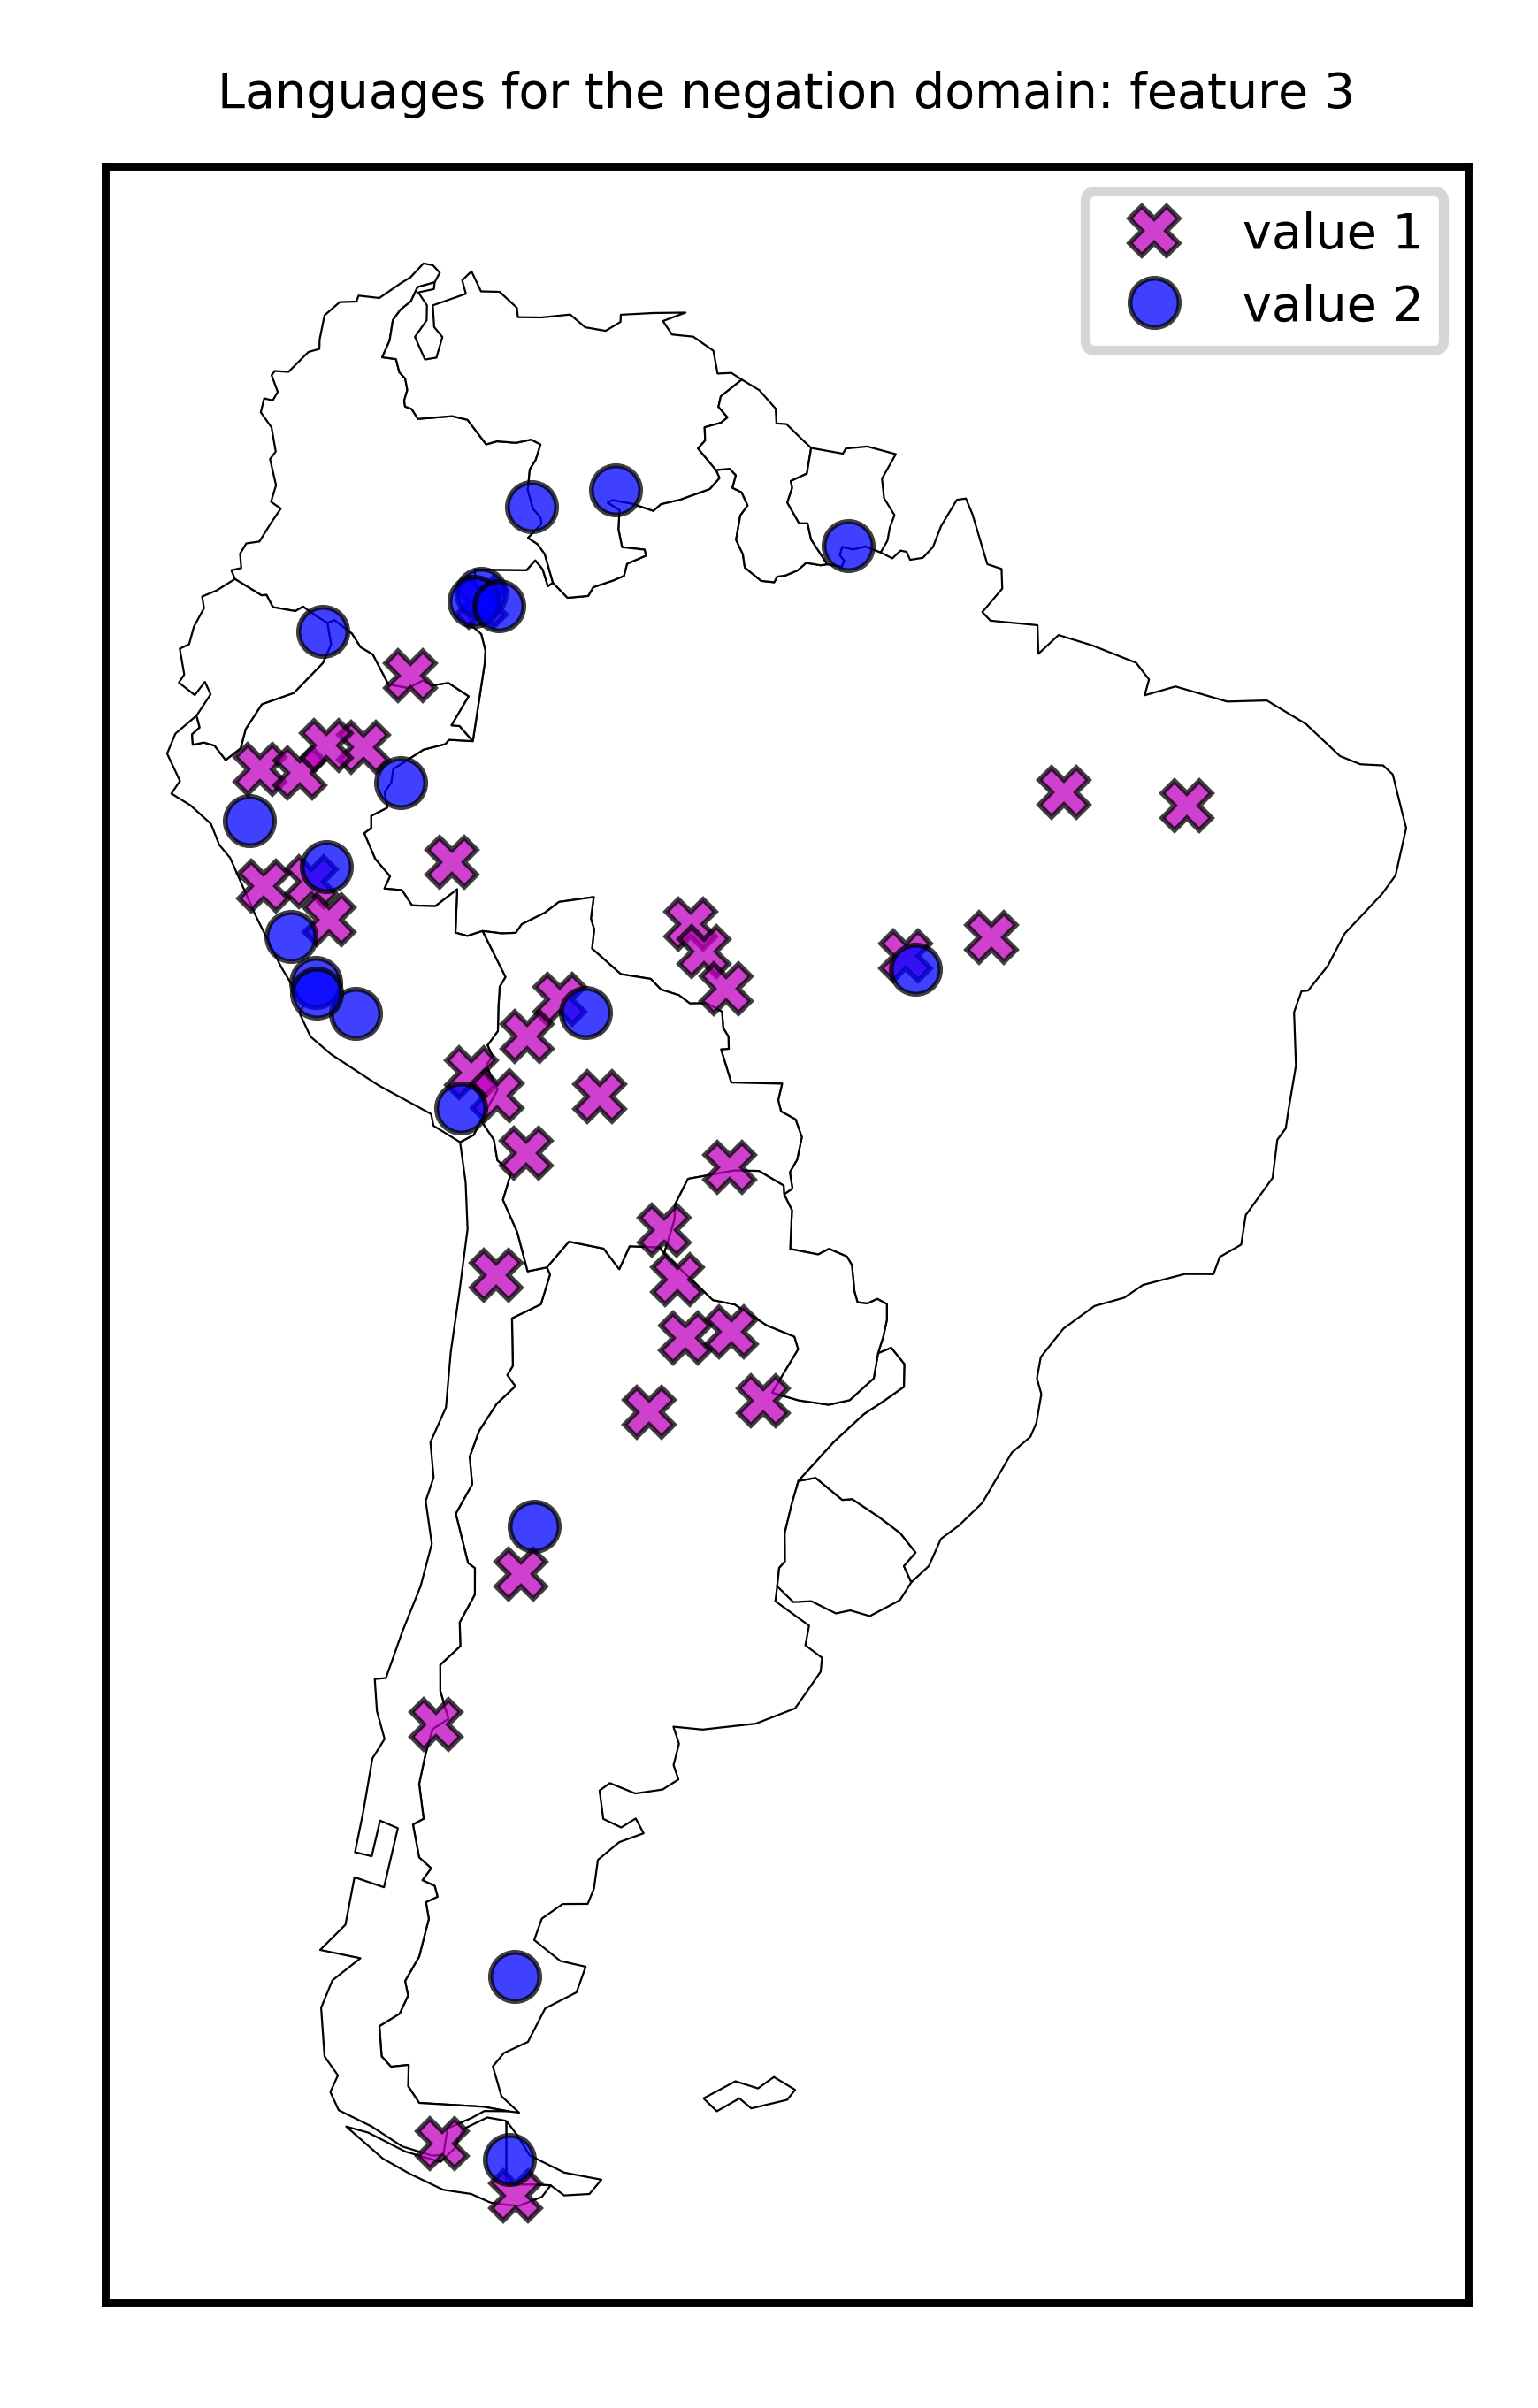

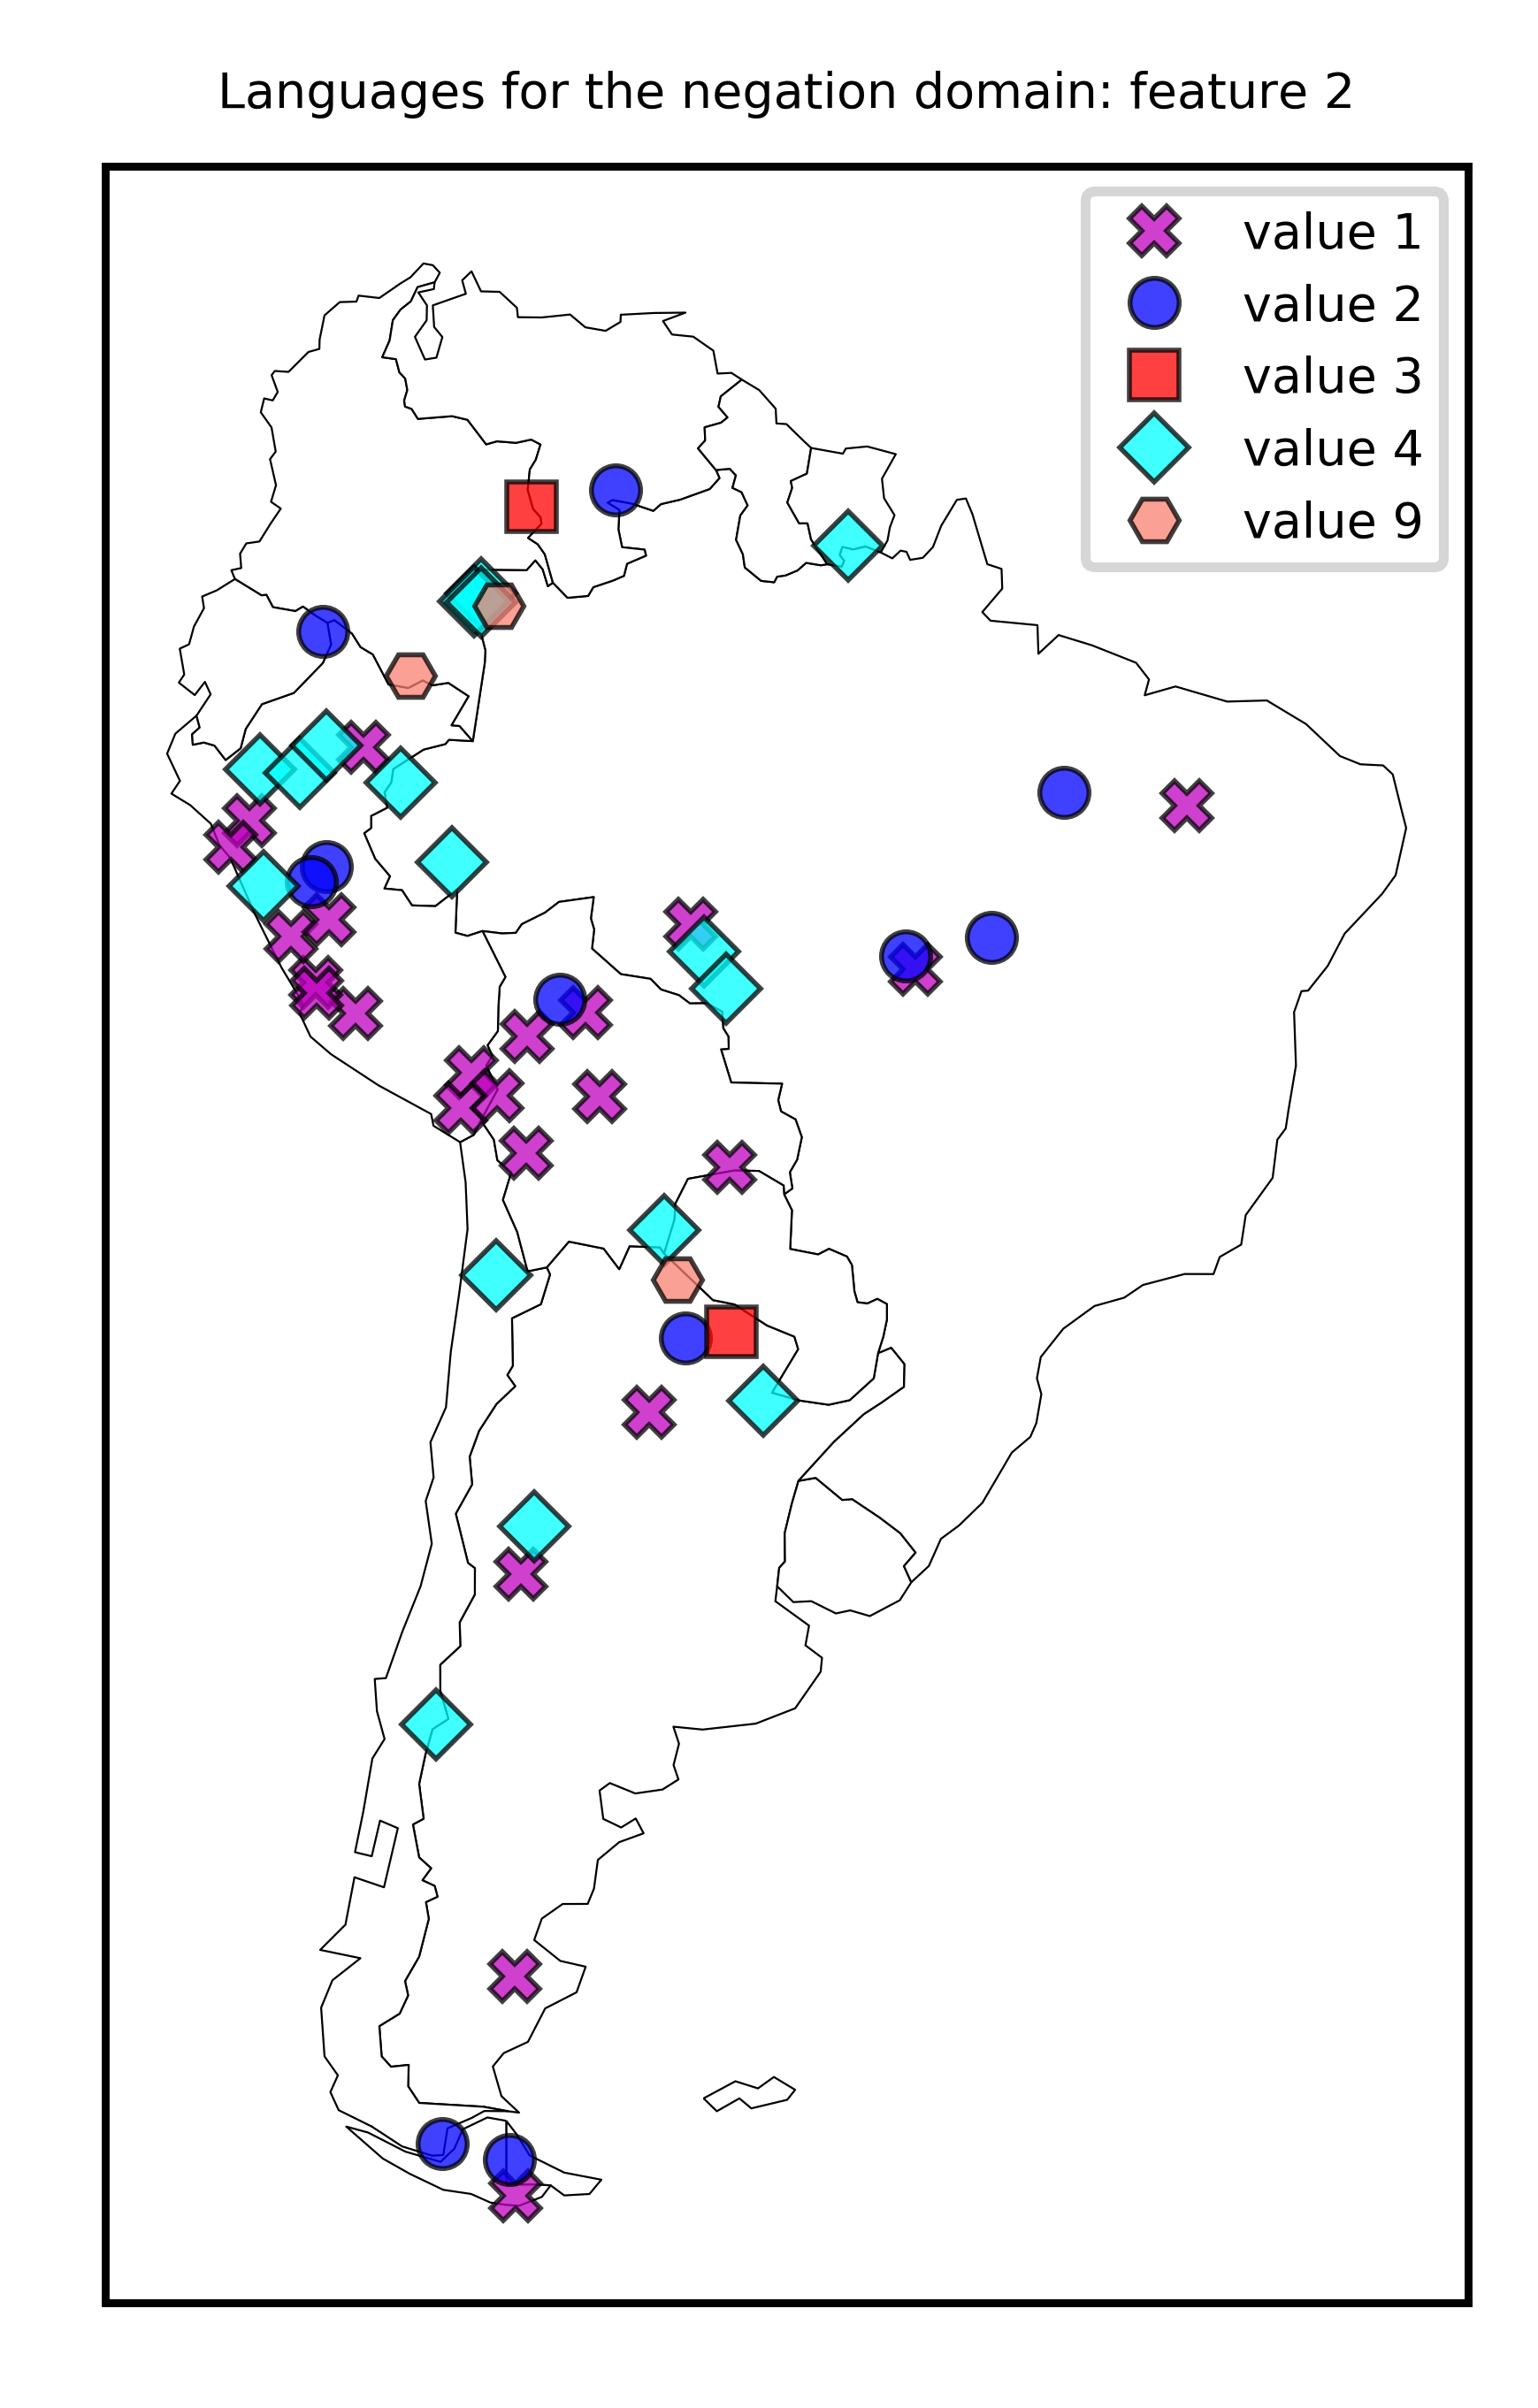

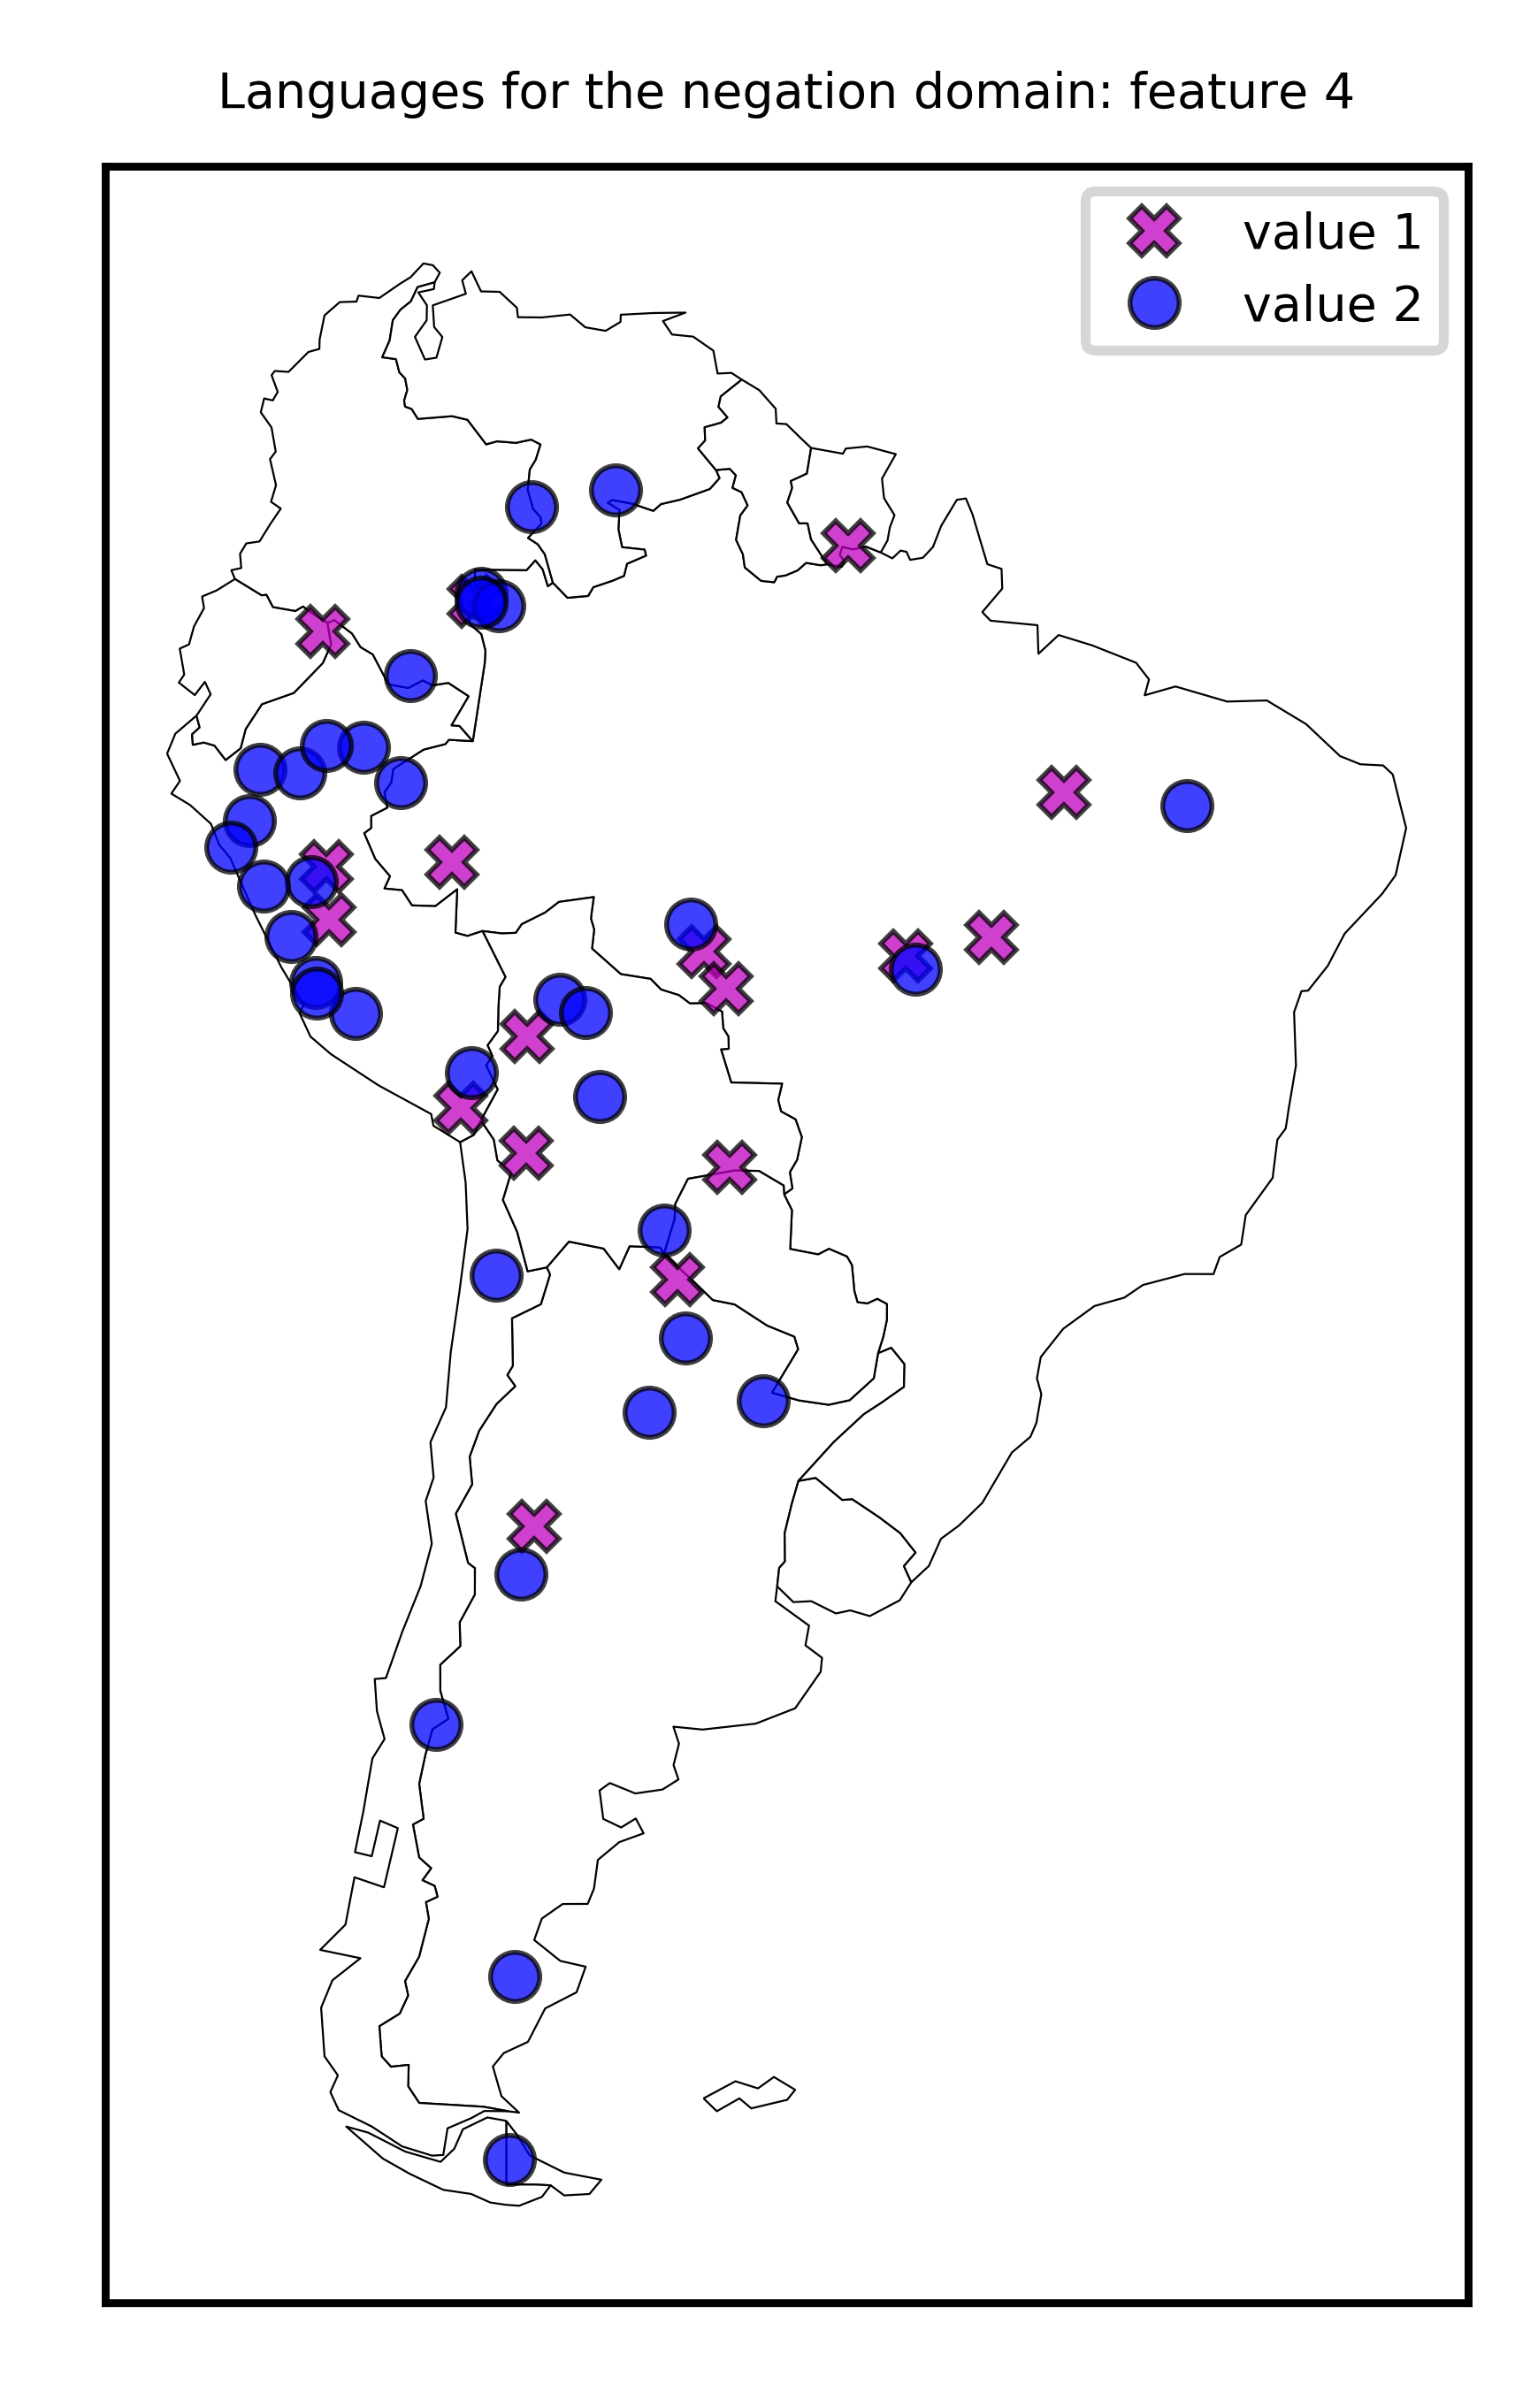

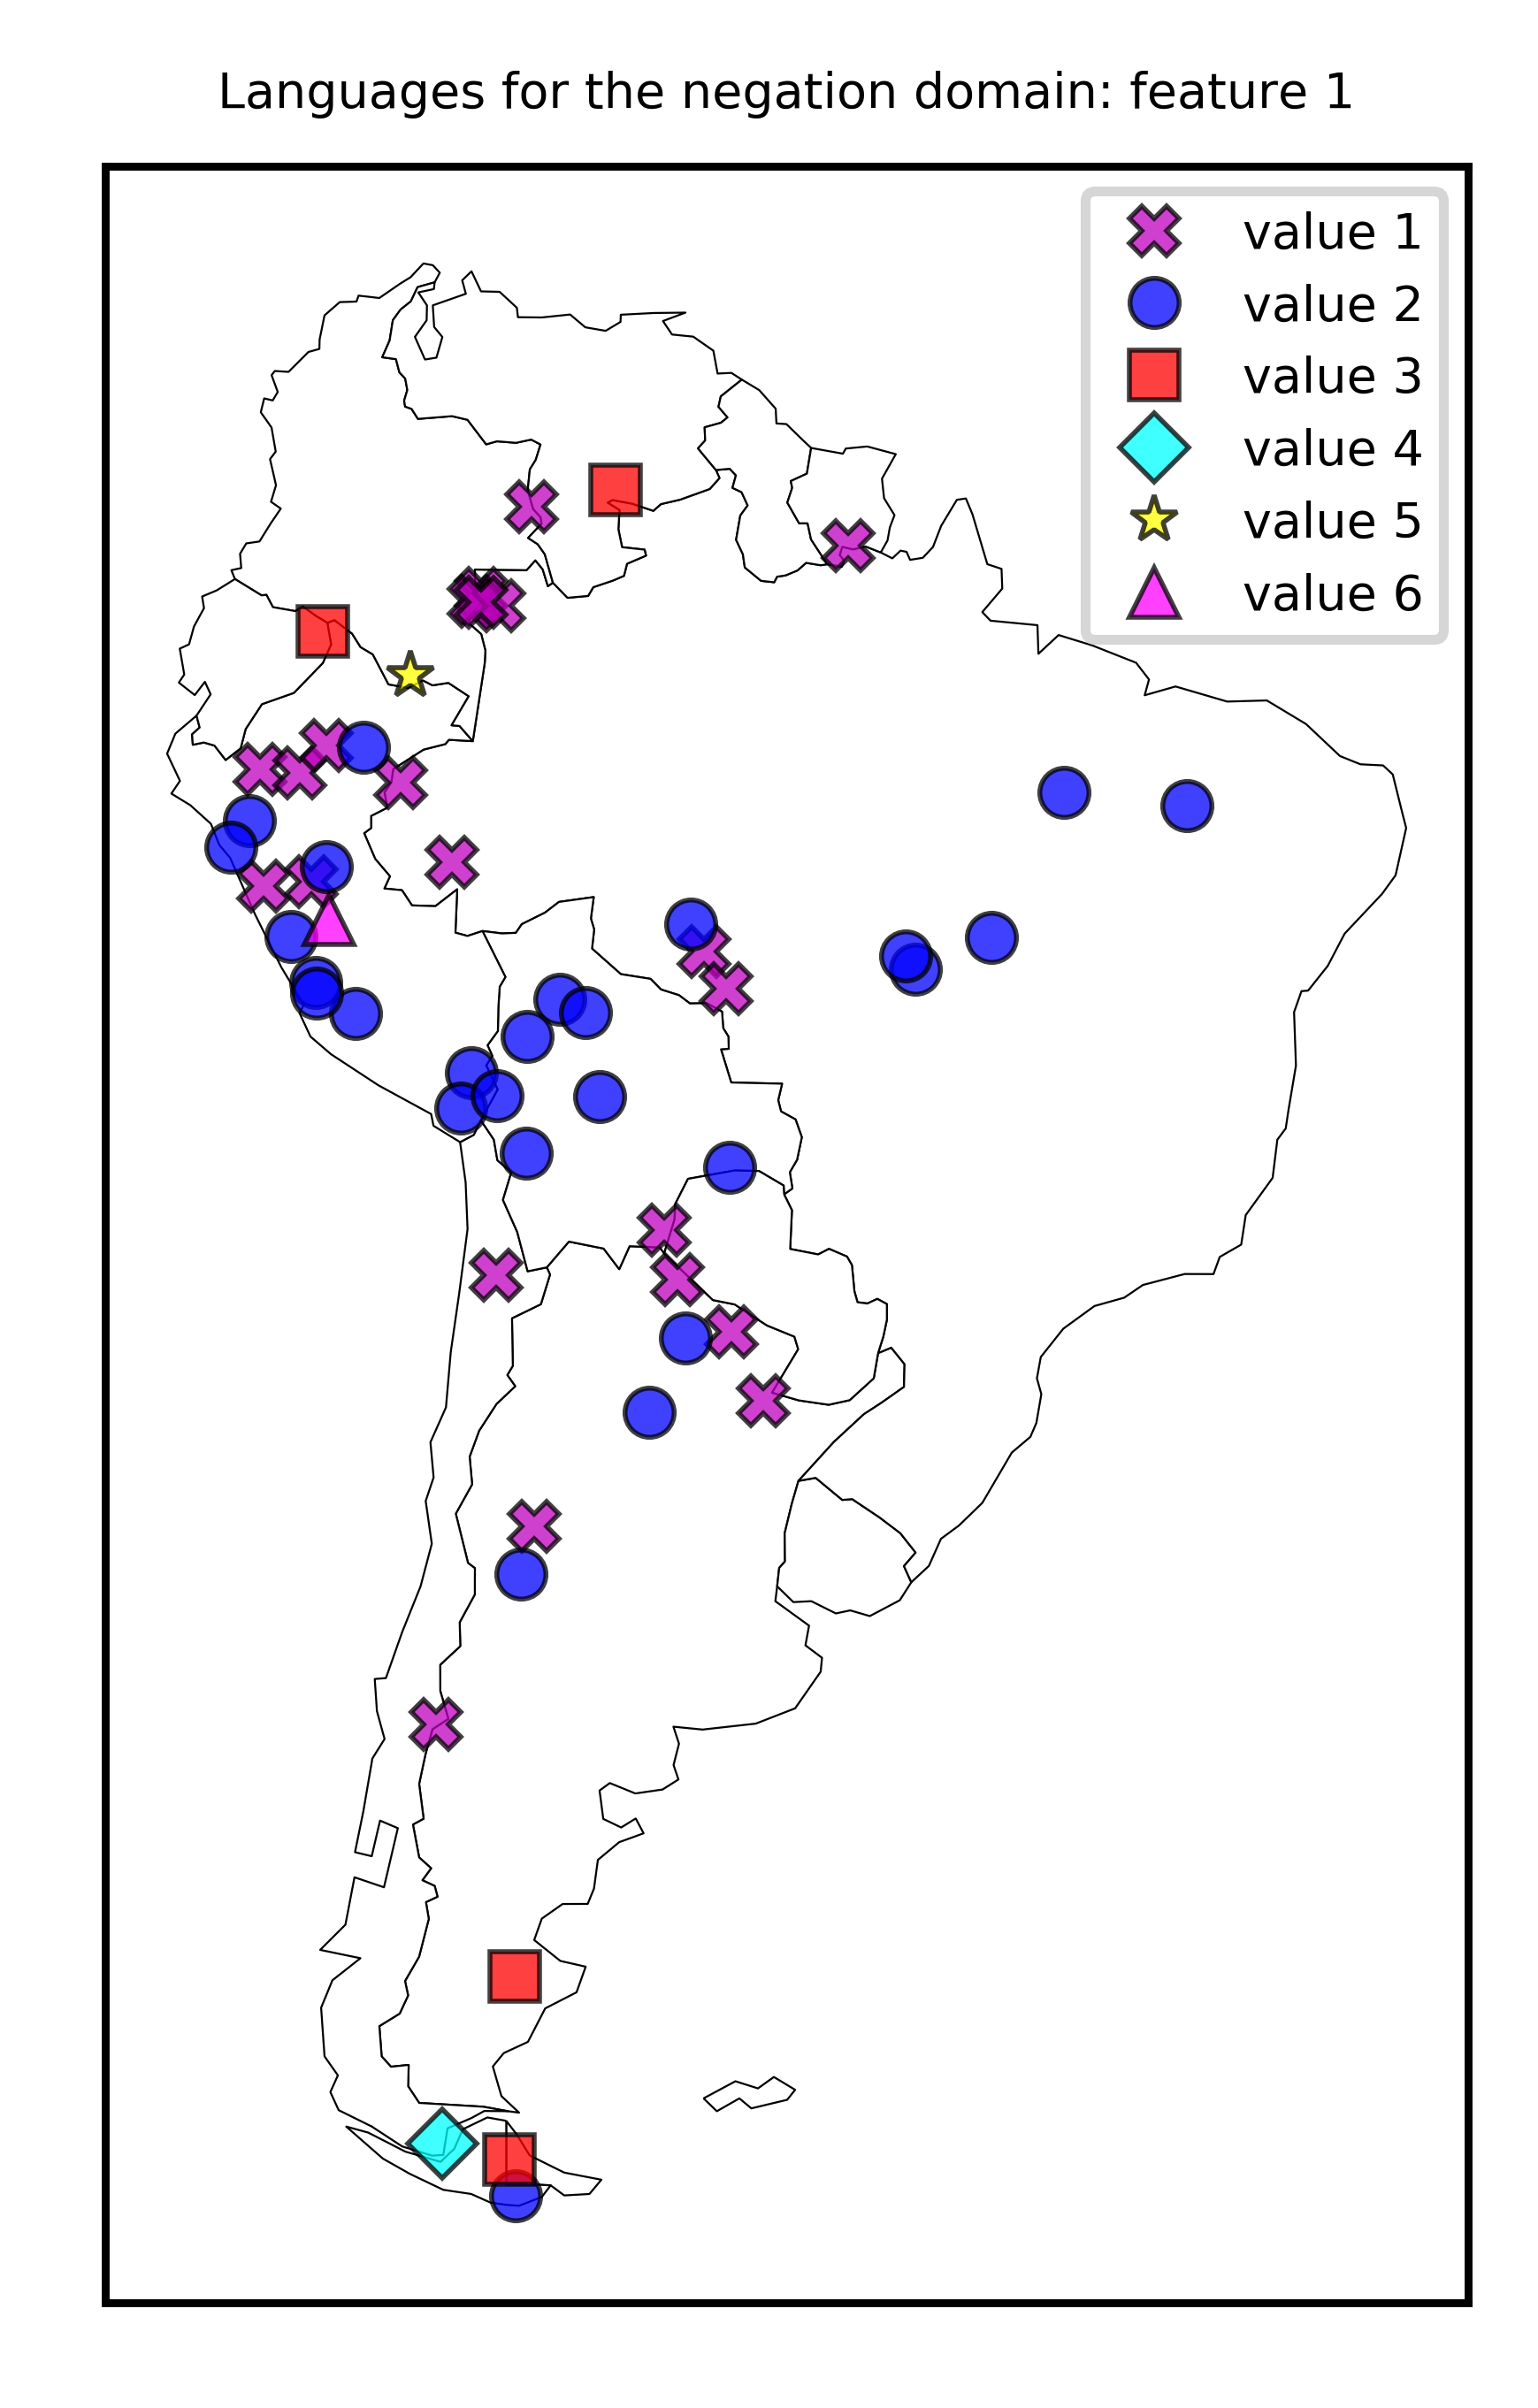

In [50]:
import matplotlib.pyplot as plt

dict_color = {'1':{'marker':'X','color':'m'},'2':{'marker':'o','color':'b'},'3':{'marker':'s','color':'r'},
             '4':{'marker':'D','color':'cyan'},'5':{'marker':'*','color':'yellow'},'6':{'marker':'^','color':'fuchsia'},
             '7':{'marker':'v','color':'olive'},'8':{'marker':'p','color':'lime'},'9':{'marker':'H','color':'salmon'}}

for rasgo in rasgos:
    
    fig, ax = plt.subplots(dpi=800)

    ax.set_aspect('equal')
    plt.title('Languages for the negation domain: feature '+rasgo[2:],fontsize=5)
    world.plot(ax=ax, color='white', edgecolor='black',linewidth=0.2)
#cities.plot(ax=ax, marker='o', color='red', markersize=5)
#ax.scatter(x, y, marker="o", color='gold', alpha=1., zorder=5, s=10)
    for f in set(values_per_feature(Dcodes,rasgo).values()):
        
        ax.plot([x[i] for i in [list(codes).index(language) for language in codes if language in values_per_feature(Dcodes,rasgo).keys() and values_per_feature(Dcodes,rasgo)[language]==f]],[y[i] for i in [list(codes).index(language) for language in codes if language in values_per_feature(Dcodes,rasgo).keys() and values_per_feature(Dcodes,rasgo)[language]==f]],marker=dict_color[str(f)]['marker'],color=dict_color[str(f)]['color'],linewidth=0,markersize=5,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='value '+str(f))
    plt.legend(loc='best',fontsize=5)

    ax.set_yticks([])
    ax.set_xticks([])
    plt.savefig('maps/mapa_rasgo'+rasgo +'.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
    plt.show()

### ¿Cómo se distribuyen las lenguas según el número de rasgos?

In [51]:
from collections import Counter

def distribucion(D):
    D_rasgos = {lengua:{} for lengua in D.keys()}
    for lengua in D.keys():
        for lengualengua in D.keys():
            features=list(D.values())
            features=[len(item) for item in features]
    C=dict(Counter(features))
    keys = sorted(C.keys())
    DD = {}
    for key in keys:
        x = 0
        for keykey in C.keys():
            if keykey>=key:
                x+=C[keykey]
        DD[key]=x
    return DD

In [52]:
distribucion(D)

{3: 56, 4: 51}

### Distancias!

In [53]:
#def filter_size(D,size=None):
#    
#    if size is not None:
#        return {key:D[key] for key in D.keys() if len(D[key])>=size}
#    else:
#        return D

In [54]:
D.keys()

dict_keys(['mapudungun', 'ancash quechua', 'cajamarca quechua', 'ecuadorian quechua', 'ayacucho quechua', 'aymara', 'jaqaru', 'chipaya', 'uchumataqu', 'cholon', 'mochica', 'kunza', 'millcayac', 'allentiac', 'selknam', 'yahgan', 'pilaga', 'wichi', 'ayoreo', 'tapiete', 'kawesqar', 'tehuelche', 'secoya', 'urarina', 'yanesha', 'tariana', 'tucano', 'yauyos quechua', 'puquina', 'lule', 'vilela', 'santiago del estero quechua', 'pacaraos quechua', 'kokama', 'gaviao', 'tiriyo', 'kalapalo', 'karaja', 'apinaye', 'kashibo-kakataibo', 'matses', 'shiwilu', 'cavineã±a', 'sanuma', 'hup', 'kulina', 'bora', 'trumai', 'yurakare', 'movima', 'puinave', 'sabane', 'aguaruna', 'kwaza', 'kakua', 'moseten'])

In [55]:
## distancia de Hamming por dominio

def hamming(lengua1, lengua2, file, names, dominio_num):
    
    ## creamos el diccionario de rasgos
    D = read_lenguas_andinas(file, names, dominio_num)
    ## ¿qué pasa si no están anotadas las lenguas?
    if lengua1 not in D.keys():
        return lengua1+' no está anotada según el dominio '+str(dominio_num)
    if lengua2 not in D.keys():
        return lengua2+' no está anotada según el dominio '+str(dominio_num)
    
    ## rasgos
    features_lengua1=D[lengua1]
    features_lengua2=D[lengua2]
    
    ## hamming!
    d=0
    n=0
    for feature in features_lengua1.keys():
        if feature in features_lengua2.keys(): 
            if features_lengua1[feature] != features_lengua2[feature]:
                d += 1.0
            n += 1.0
    if n==0:
        return 1
    else:
        return d/n

In [56]:
hamming('ecuadorian quechua','kunza','TabladeDatos.csv','andean languages.csv',4)

0.5

In [57]:
## mapa de calor de distancias

distancias_dict = {lengua:{lengualengua:hamming(lengua,lengualengua,'TabladeDatos.csv','andean languages.csv',4) for lengualengua in D.keys()} for lengua in D.keys()}

In [58]:
distancias_dict['ecuadorian quechua']

{'mapudungun': 0.5,
 'ancash quechua': 0.5,
 'cajamarca quechua': 0.25,
 'ecuadorian quechua': 0.0,
 'ayacucho quechua': 0.25,
 'aymara': 0.5,
 'jaqaru': 0.25,
 'chipaya': 0.25,
 'uchumataqu': 0.0,
 'cholon': 0.5,
 'mochica': 0.0,
 'kunza': 0.5,
 'millcayac': 1.0,
 'allentiac': 0.0,
 'selknam': 0.75,
 'yahgan': 0.0,
 'pilaga': 0.6666666666666666,
 'wichi': 0.75,
 'ayoreo': 0.25,
 'tapiete': 0.5,
 'kawesqar': 0.6666666666666666,
 'tehuelche': 0.5,
 'secoya': 1.0,
 'urarina': 0.5,
 'yanesha': 0.5,
 'tariana': 0.75,
 'tucano': 0.5,
 'yauyos quechua': 0.25,
 'puquina': 0.0,
 'lule': 0.25,
 'vilela': 0.5,
 'santiago del estero quechua': 0.0,
 'pacaraos quechua': 0.25,
 'kokama': 0.0,
 'gaviao': 0.0,
 'tiriyo': 1.0,
 'kalapalo': 0.25,
 'karaja': 0.5,
 'apinaye': 0.5,
 'kashibo-kakataibo': 0.75,
 'matses': 0.75,
 'shiwilu': 0.5,
 'cavineã±a': 0.25,
 'sanuma': 0.75,
 'hup': 1.0,
 'kulina': 0.75,
 'bora': 0.5,
 'trumai': 0.5,
 'yurakare': 0.0,
 'movima': 0.25,
 'puinave': 0.75,
 'sabane': 0.75,

In [59]:
DF = pd.DataFrame.from_dict(distancias_dict,orient = 'index', columns = pd.DataFrame.from_dict(distancias_dict).index)

In [60]:
DF

mapudungun  ancash quechua  cajamarca quechua  \
mapudungun                     0.000000        0.000000           0.750000   
ancash quechua                 0.000000        0.000000           0.750000   
cajamarca quechua              0.750000        0.750000           0.000000   
ecuadorian quechua             0.500000        0.500000           0.250000   
ayacucho quechua               0.750000        0.750000           0.000000   
aymara                         1.000000        1.000000           0.250000   
jaqaru                         0.750000        0.750000           0.000000   
chipaya                        0.750000        0.750000           0.500000   
uchumataqu                     0.666667        0.666667           0.333333   
cholon                         0.250000        0.250000           0.750000   
mochica                        0.666667        0.666667           0.000000   
kunza                          0.000000        0.000000           0.750000   
millcayac                      0.500000        0.500000           0.750000   
allentiac                      0.500000        0.500000           0.250000   
selknam                        0.750000        0.750000           0.500000   
yahgan                         0.666667        0.666667           0.333333   
pilaga                         0.333333        0.333333           1.000000   
wichi                          0.500000        0.500000           1.000000   
ayoreo                         0.750000        0.750000           0.500000   
tapiete                        0.000000        0.000000           0.750000   
kawesqar                       0.666667        0.666667           1.000000   
tehuelche                      0.750000        0.750000           0.250000   
secoya                         1.000000        1.000000           0.750000   
urarina                        0.000000        0.000000           0.750000   
yanesha                        0.750000        0.750000           0.750000   
tariana                        0.500000        0.500000           0.500000   
tucano                         0.000000        0.000000           0.750000   
yauyos quechua                 0.750000        0.750000           0.000000   
puquina                        0.500000        0.500000           0.250000   
lule                           0.500000        0.500000           0.500000   
vilela                         0.000000        0.000000           0.750000   
santiago del estero quechua    0.500000        0.500000           0.250000   
pacaraos quechua               0.750000        0.750000           0.000000   
kokama                         0.500000        0.500000           0.250000   
gaviao                         0.500000        0.500000           0.250000   
tiriyo                         0.500000        0.500000           0.750000   
kalapalo                       0.750000        0.750000           0.000000   
karaja                         0.750000        0.750000           0.750000   
apinaye                        0.750000        0.750000           0.750000   
kashibo-kakataibo              1.000000        1.000000           0.500000   
matses                         0.250000        0.250000           0.500000   
shiwilu                        0.000000        0.000000           0.750000   
cavineã±a                      0.500000        0.500000           0.500000   
sanuma                         0.750000        0.750000           0.500000   
hup                            0.500000        0.500000           0.750000   
kulina                         0.250000        0.250000           1.000000   
bora                           0.500000        0.500000           0.750000   
trumai                         0.750000        0.750000           0.750000   
yurakare                       0.500000        0.500000           0.250000   
movima                         0.750000        0.750000           0.000000   
puinave                        0.500000        0.50

In [61]:
DF.keys()

Index(['mapudungun', 'ancash quechua', 'cajamarca quechua',
       'ecuadorian quechua', 'ayacucho quechua', 'aymara', 'jaqaru', 'chipaya',
       'uchumataqu', 'cholon', 'mochica', 'kunza', 'millcayac', 'allentiac',
       'selknam', 'yahgan', 'pilaga', 'wichi', 'ayoreo', 'tapiete', 'kawesqar',
       'tehuelche', 'secoya', 'urarina', 'yanesha', 'tariana', 'tucano',
       'yauyos quechua', 'puquina', 'lule', 'vilela',
       'santiago del estero quechua', 'pacaraos quechua', 'kokama', 'gaviao',
       'tiriyo', 'kalapalo', 'karaja', 'apinaye', 'kashibo-kakataibo',
       'matses', 'shiwilu', 'cavineã±a', 'sanuma', 'hup', 'kulina', 'bora',
       'trumai', 'yurakare', 'movima', 'puinave', 'sabane', 'aguaruna',
       'kwaza', 'kakua', 'moseten'],
      dtype='object')

## Mapa de calor

In [62]:
areas = pd.read_csv('areas.csv',sep=',',encoding='utf-8')

In [63]:
areas

correlativo                       lengua        sub-area  \
0             1                   mapudungun  southern andes   
1             2               ancash quechua   central andes   
2             3            cajamarca quechua   central andes   
3             4           ecuadorian quechua   central andes   
4             5             ayacucho quechua   central andes   
5             7                       aymara   central andes   
6             8                       jaqaru   central andes   
7             9                      chipaya   central andes   
8            10                   uchumataqu   central andes   
9            11                       cholon  northern andes   
10           12                      mochica  northern andes   
11           13                        kunza  southern andes   
12           14                    millcayac  southern andes   
13           15                    allentiac  southern andes   
14           16                      selknam       patagonia   
15           17                       yahgan       patagonia   
16           21                       pilaga           chaco   
17           23                        wichi           chaco   
18           25                       ayoreo           chaco   
19           26                      tapiete           chaco   
20           27                     kawesqar       patagonia   
21           28                    tehuelche       patagonia   
22           29                       secoya        amazonia   
23           30                      urarina   amazonia near   
24           35                      yanesha        amazonia   
25           36                      tariana        amazonia   
26           37                       tucano        amazonia   
27           39               yauyos quechua   central andes   
28           41                      puquina   central andes   
29           42                         lule           chaco   
30           43                       vilela           chaco   
31           44  santiago del estero quechua   central andes   
32           45             pacaraos quechua   central andes   
33           46                       kokama   amazonia near   
34           47                       gaviao    amazonia far   
35           48                       tiriyo    amazonia far   
36           49                     kalapalo    amazonia far   
37           50                       karaja    amazonia far   
38           51                      apinaye    amazonia far   
39           52            kashibo-Kakataibo   amazonia near   
40           53                       matses    amazonia far   
41           54                      shiwilu   amazonia near   
42           55                     cavineña   amazonia near   
43           56                       sanuma    amazonia far   
44           57                          hup    amazonia far   
45           58                       kulina    amazonia far   
46           59                         bora   amazonia near   
47           61                       trumai    amazonia far   
48           63                     yurakare   amazonia near   
49           64                       movima   amazonia near   
50           65                      puinave    amazonia far   
51           71                       sabane    amazonia far   
52           72                     aguaruna   amazonia near   
53           74                        kwaza    amazonia far   
54           75                        kakua    amazonia far   
55           76                      moseten   amazonia near   

       birchall-areas birchall-east-west       area  
0       southern cone               west      andes  
1       central Andes               west      andes  
2       central Andes               west      andes  
3      northern Andes               west      andes  
4       central Andes               west      andes  
5       central Andes          

In [64]:
## construyamos un heatmap :) https://seaborn.pydata.org/generated/seaborn.heatmap.html

import seaborn as sns
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
import numpy as np

def mapa_calor(D,file_areas,hipotesis=0):
    
    ## hipotesis
    ## 0: nop! solo lenguas :)
    ## 1: sub-area
    ## 2: birchall-areas
    ## 3: birchall-este-oeste
    ## 4: areas control :)
    areas = pd.read_csv(file_areas,sep=',',encoding='utf-8')
    lenguas = [name.lower() for name in list(areas['lengua'])]
    areas_dict = {}
    for i in list(areas.index):
        if areas.loc[i,'lengua'].lower()=='moseten':
            areas_dict['moseten']=[areas.loc[i,'sub-area'].lower(),areas.loc[i,'birchall-areas'].lower(),areas.loc[i,'birchall-east-west'].lower(),areas.loc[i,'area'].lower()]
        else:
            areas_dict[areas.loc[i,'lengua'].lower()]=[areas.loc[i,'sub-area'].lower(),areas.loc[i,'birchall-areas'].lower(),areas.loc[i,'birchall-east-west'].lower(),areas.loc[i,'area'].lower()]
    #nombres = list(D.columns)
    #regiones = [nom_area[name] for name in nombres]
    ## clustering!
    
    linkage = hc.linkage(sp.distance.squareform(D), method='ward')
        
    plt.figure(figsize=(10,10))
    if hipotesis>0:
        cg=sns.clustermap(D,cmap='OrRd',linewidth=1,row_linkage=linkage, col_linkage=linkage,yticklabels=True,xticklabels=True,cbar_kws={'shrink': 0.3})
        regiones=[]
        for tick_label in cg.ax_heatmap.axes.get_yticklabels():
            tick_text = tick_label.get_text()
            if tick_text in areas_dict.keys():
                regiones += [areas_dict[tick_text][hipotesis-1]]
            else:
                regiones += ['unk']
        
        cg.ax_heatmap.axes.set_xticks(np.arange(0.5,len(regiones)+0.5))
        cg.ax_heatmap.axes.set_xticklabels(regiones)
        cg.ax_heatmap.axes.set_yticks(np.arange(0.5,len(regiones)+0.5))
        cg.ax_heatmap.axes.set_yticklabels(regiones)
    else:
        cg=sns.clustermap(D,cmap='OrRd',linewidth=1,row_linkage=linkage, col_linkage=linkage,yticklabels=True,xticklabels=True,cbar_kws={'shrink': 0.3})
    cg.ax_heatmap.set_yticklabels(cg.ax_heatmap.get_ymajorticklabels(), fontsize = 9)
    cg.ax_heatmap.set_xticklabels(cg.ax_heatmap.get_xmajorticklabels(), fontsize = 9)
    plt.rcParams.update({'font.size': 12})
    plt.savefig('heatmaps/heatmap_4_'+str(hipotesis)+'.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)

<Figure size 720x720 with 0 Axes>

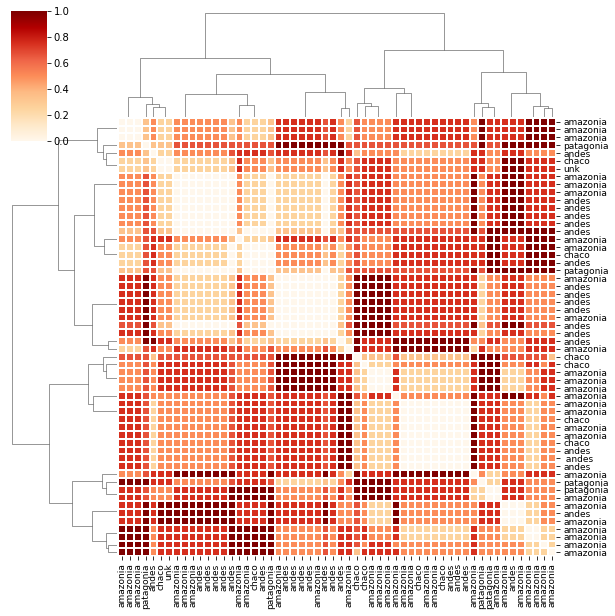

In [65]:
## mapa de calor por áreas
## se podría incluir cualquier etiqueta de las lenguas: área, subárea, familia, ... :)

mapa_calor(DF,'areas.csv',4)

In [66]:
## Clustering aglomerativo

In [67]:
#from scipy.cluster.hierarchy import dendrogram
#from sklearn.cluster import AgglomerativeClustering
#import numpy as np

In [68]:
#from sklearn.metrics import silhouette_score
#
#labels_dict = {}
#
#range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
#S = []
#for n_clusters in range_n_clusters:
#    
#    cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
#    #distArray = sp.distance.squareform(D.to_numpy())
#    cluster_labels = cluster.fit_predict(DF.values)
#    labels_dict[n_clusters]=cluster_labels
#    silhouette_avg = silhouette_score(DF.values, cluster_labels, metric = 'precomputed')
#    S.append(silhouette_avg)
#    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

In [69]:
#import matplotlib.pyplot as plt
#
#fig, ax = plt.subplots(dpi=800)
#
#ax.plot(range_n_clusters, S, linewidth=0.5, marker='o',color='orange',markersize=5,markeredgecolor='k',markeredgewidth=1,fillstyle='full',clip_on=True)
#plt.xlabel(r'número de clusters',fontsize=12)
#plt.ylabel(r'coeficiente de silhoutte',fontsize=12)
#plt.rcParams.update({'font.size': 10})
#plt.savefig('evaluacion_custering.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
#plt.show()

In [70]:
#n_clusters=2
#
#cluster_dict = dict(zip(DF.index,labels_dict[n_clusters]))

In [71]:
#group_dict = {n:[k for k in cluster_dict.keys() if cluster_dict[k] == n] for n in set(cluster_dict.values())}

In [72]:
#group_dict

In [73]:
## miremos familias lingüísticas (Glottolog!!!)

#import pickle
# 
#id_family = pickle.load(open('id_family.p','rb'))
#lenguas_areas = pd.read_csv(names,sep=';',encoding='cp1252')
#lenguas_glotto = lenguas_areas[['Nombre Lengua','GlottoCode']]
#lenguas_glotto = dict(zip(list([L.lower() for L in lenguas_glotto['Nombre Lengua']]),list(lenguas_glotto['GlottoCode'])))
#lenguas_glotto = {k: v for k, v in lenguas_glotto.items() if pd.Series(v).notna().all()}

In [74]:
#family_dict = {key:[id_family[lenguas_glotto[L]] for L in group_dict[key] if L in lenguas_glotto.keys() and lenguas_glotto[L] in id_family.keys()] for key in group_dict.keys()}

In [75]:
#family_dict

## Rasgos en común

### 2D

In [76]:
## filtramos los datos leídos

def filter_rasgos_comun(D,num_rasgos):
    
    ## buscamos los rasgos en común
    rasgos_comunes = [list(item.keys()) for item in D.values() if len(item)>num_rasgos]
    ## intersectamos todos los conjuntos de rasgos sujetos a la condición len(item)>num_rasgos
    rasgos_comunes = set(rasgos_comunes[0]).intersection(*rasgos_comunes)
    ## restringimos D
    D = {lengua:{key:D[lengua][key] for key in rasgos_comunes} for lengua in D.keys() if len(D[lengua])>num_rasgos}
    return D

In [77]:
D = read_lenguas_andinas('TabladeDatos.csv','andean languages.csv',4)

In [78]:
## lenguas con al menos rasgos rasgos!
rasgos=3

D = filter_rasgos_comun(D,rasgos)

In [79]:
len(D)

51

In [80]:
len(D['mapudungun'])

4

In [81]:
## en X guardamos todas las listas de rasgos

X=[]
for language in D.keys():
    X+=[list(D[language].values())]

In [82]:
from sklearn.manifold import TSNE

X = TSNE(n_components=2,perplexity=10,init='pca',random_state=0).fit_transform(X)

In [83]:
#from sklearn.decomposition import KernelPCA
#transformer = KernelPCA(n_components=2, kernel='rbf')
#X = transformer.fit_transform(X)

In [84]:
x=list(zip(*list(X)))[0]
y=list(zip(*list(X)))[1]

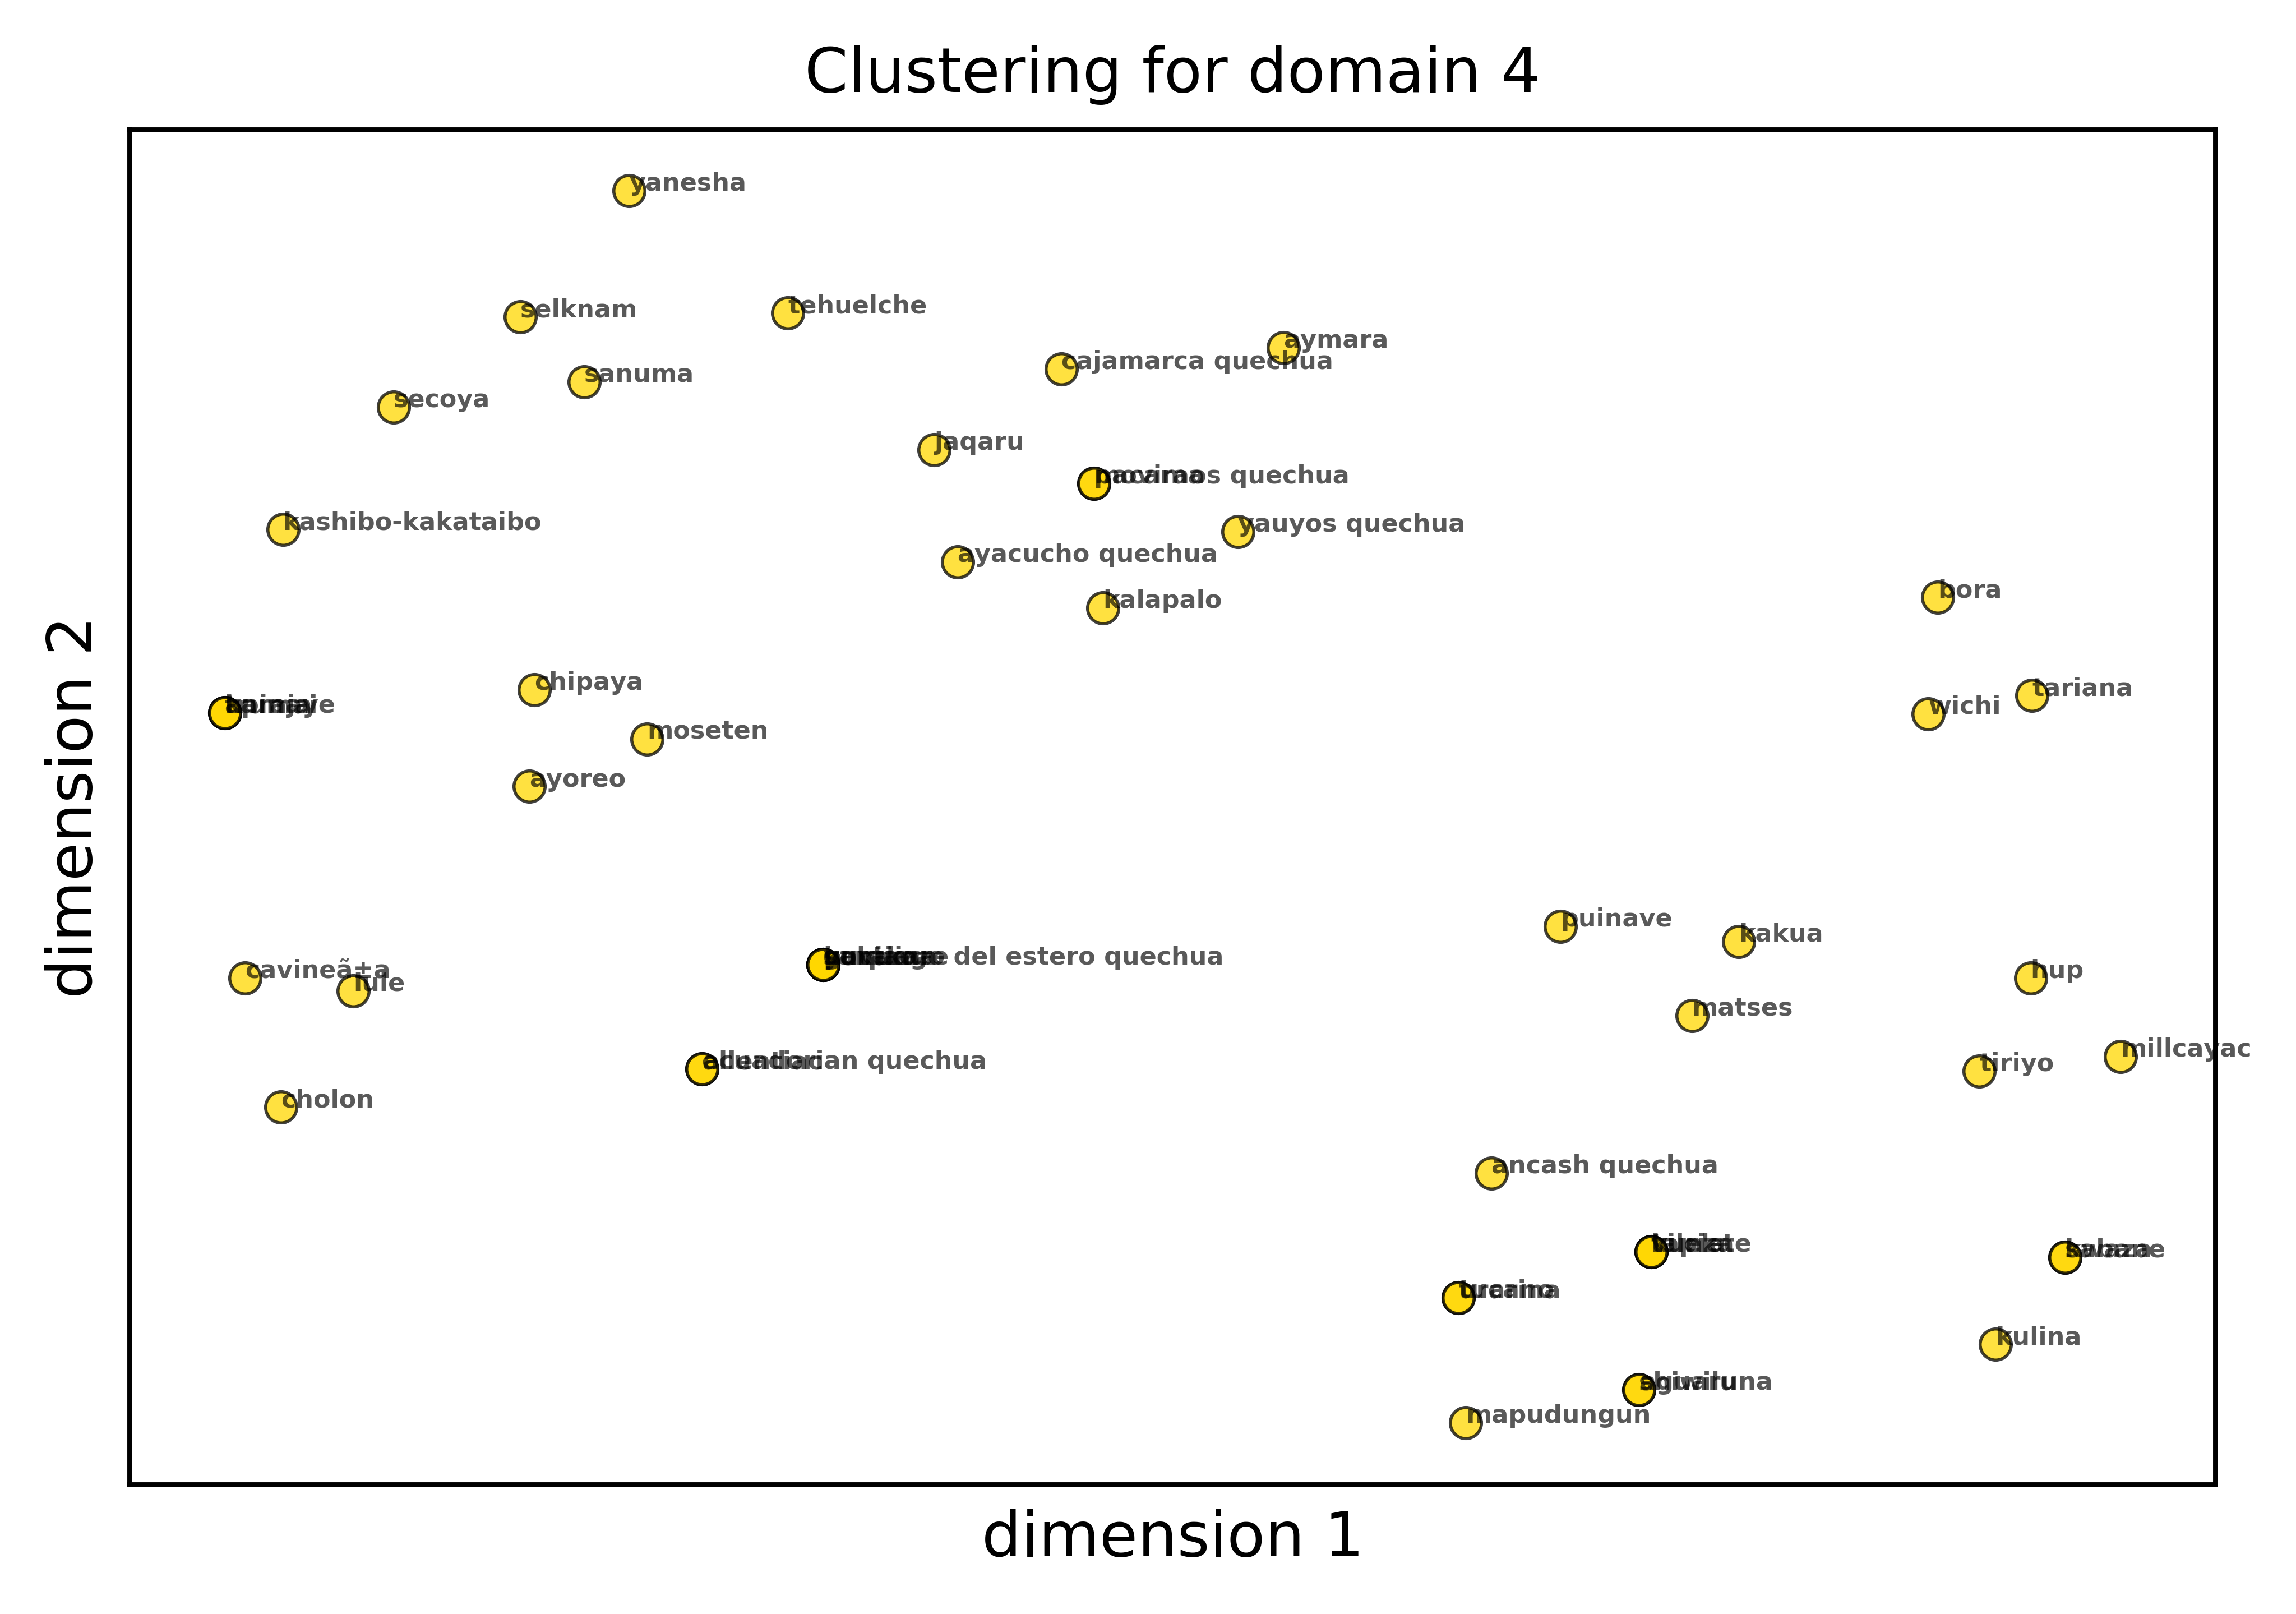

In [85]:
dominio_number=4

import matplotlib.pyplot as plt

cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(dpi=800)

for i in range(len(x)):
    ax.annotate(list(D.keys())[i], weight='demi', color='k', xy=(x[i],y[i]), fontsize=4, alpha=0.65)
#    ax.annotate(labels[i], weight='demi', color='r', xy=(x[i]-1.5,y[i]-1.5), fontsize=4, alpha=0.85)

ax.plot([x[i] for i in [list(D.keys()).index(language) for language in D.keys()]],[y[i] for i in [list(D.keys()).index(language) for language in D.keys()]],'o',color='gold',markersize=5,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True)

#ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] in ['Mayan','Otomanguean']]],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] in ['Mayan','Otomanguean']]],'X',color='m',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='Maya+Otomangue')
#ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and macroarea[glotto_iso[language]]=='South America']],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and macroarea[glotto_iso[language]]=='South America']],'H',color='orange',markersize=5,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='South America')
#ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and macroarea[glotto_iso[language]]=='North America']],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and macroarea[glotto_iso[language]]=='North America']],'o',color='lime',markersize=5,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='North America')

plt.grid(False)
plt.title('Clustering for domain '+str(dominio_number),fontsize=10)
ax.set_yticks([])
ax.set_xticks([])
#plt.legend(loc='best',fontsize=7)
plt.ylabel(r'dimension 2',fontsize=10)
plt.xlabel(r'dimension 1',fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.savefig('2D/PCA_'+str(dominio_number)+'.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [86]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
S = []
for n_clusters in range_n_clusters:
    
    cluster = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    labels = cluster.labels_
    silhouette_avg = silhouette_score(X, labels)
    S.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.55956316
For n_clusters = 3 The average silhouette_score is : 0.5268136
For n_clusters = 4 The average silhouette_score is : 0.47333115
For n_clusters = 5 The average silhouette_score is : 0.470583
For n_clusters = 6 The average silhouette_score is : 0.49062803
For n_clusters = 7 The average silhouette_score is : 0.5083351
For n_clusters = 8 The average silhouette_score is : 0.54378915
For n_clusters = 9 The average silhouette_score is : 0.57838804
For n_clusters = 10 The average silhouette_score is : 0.60648185


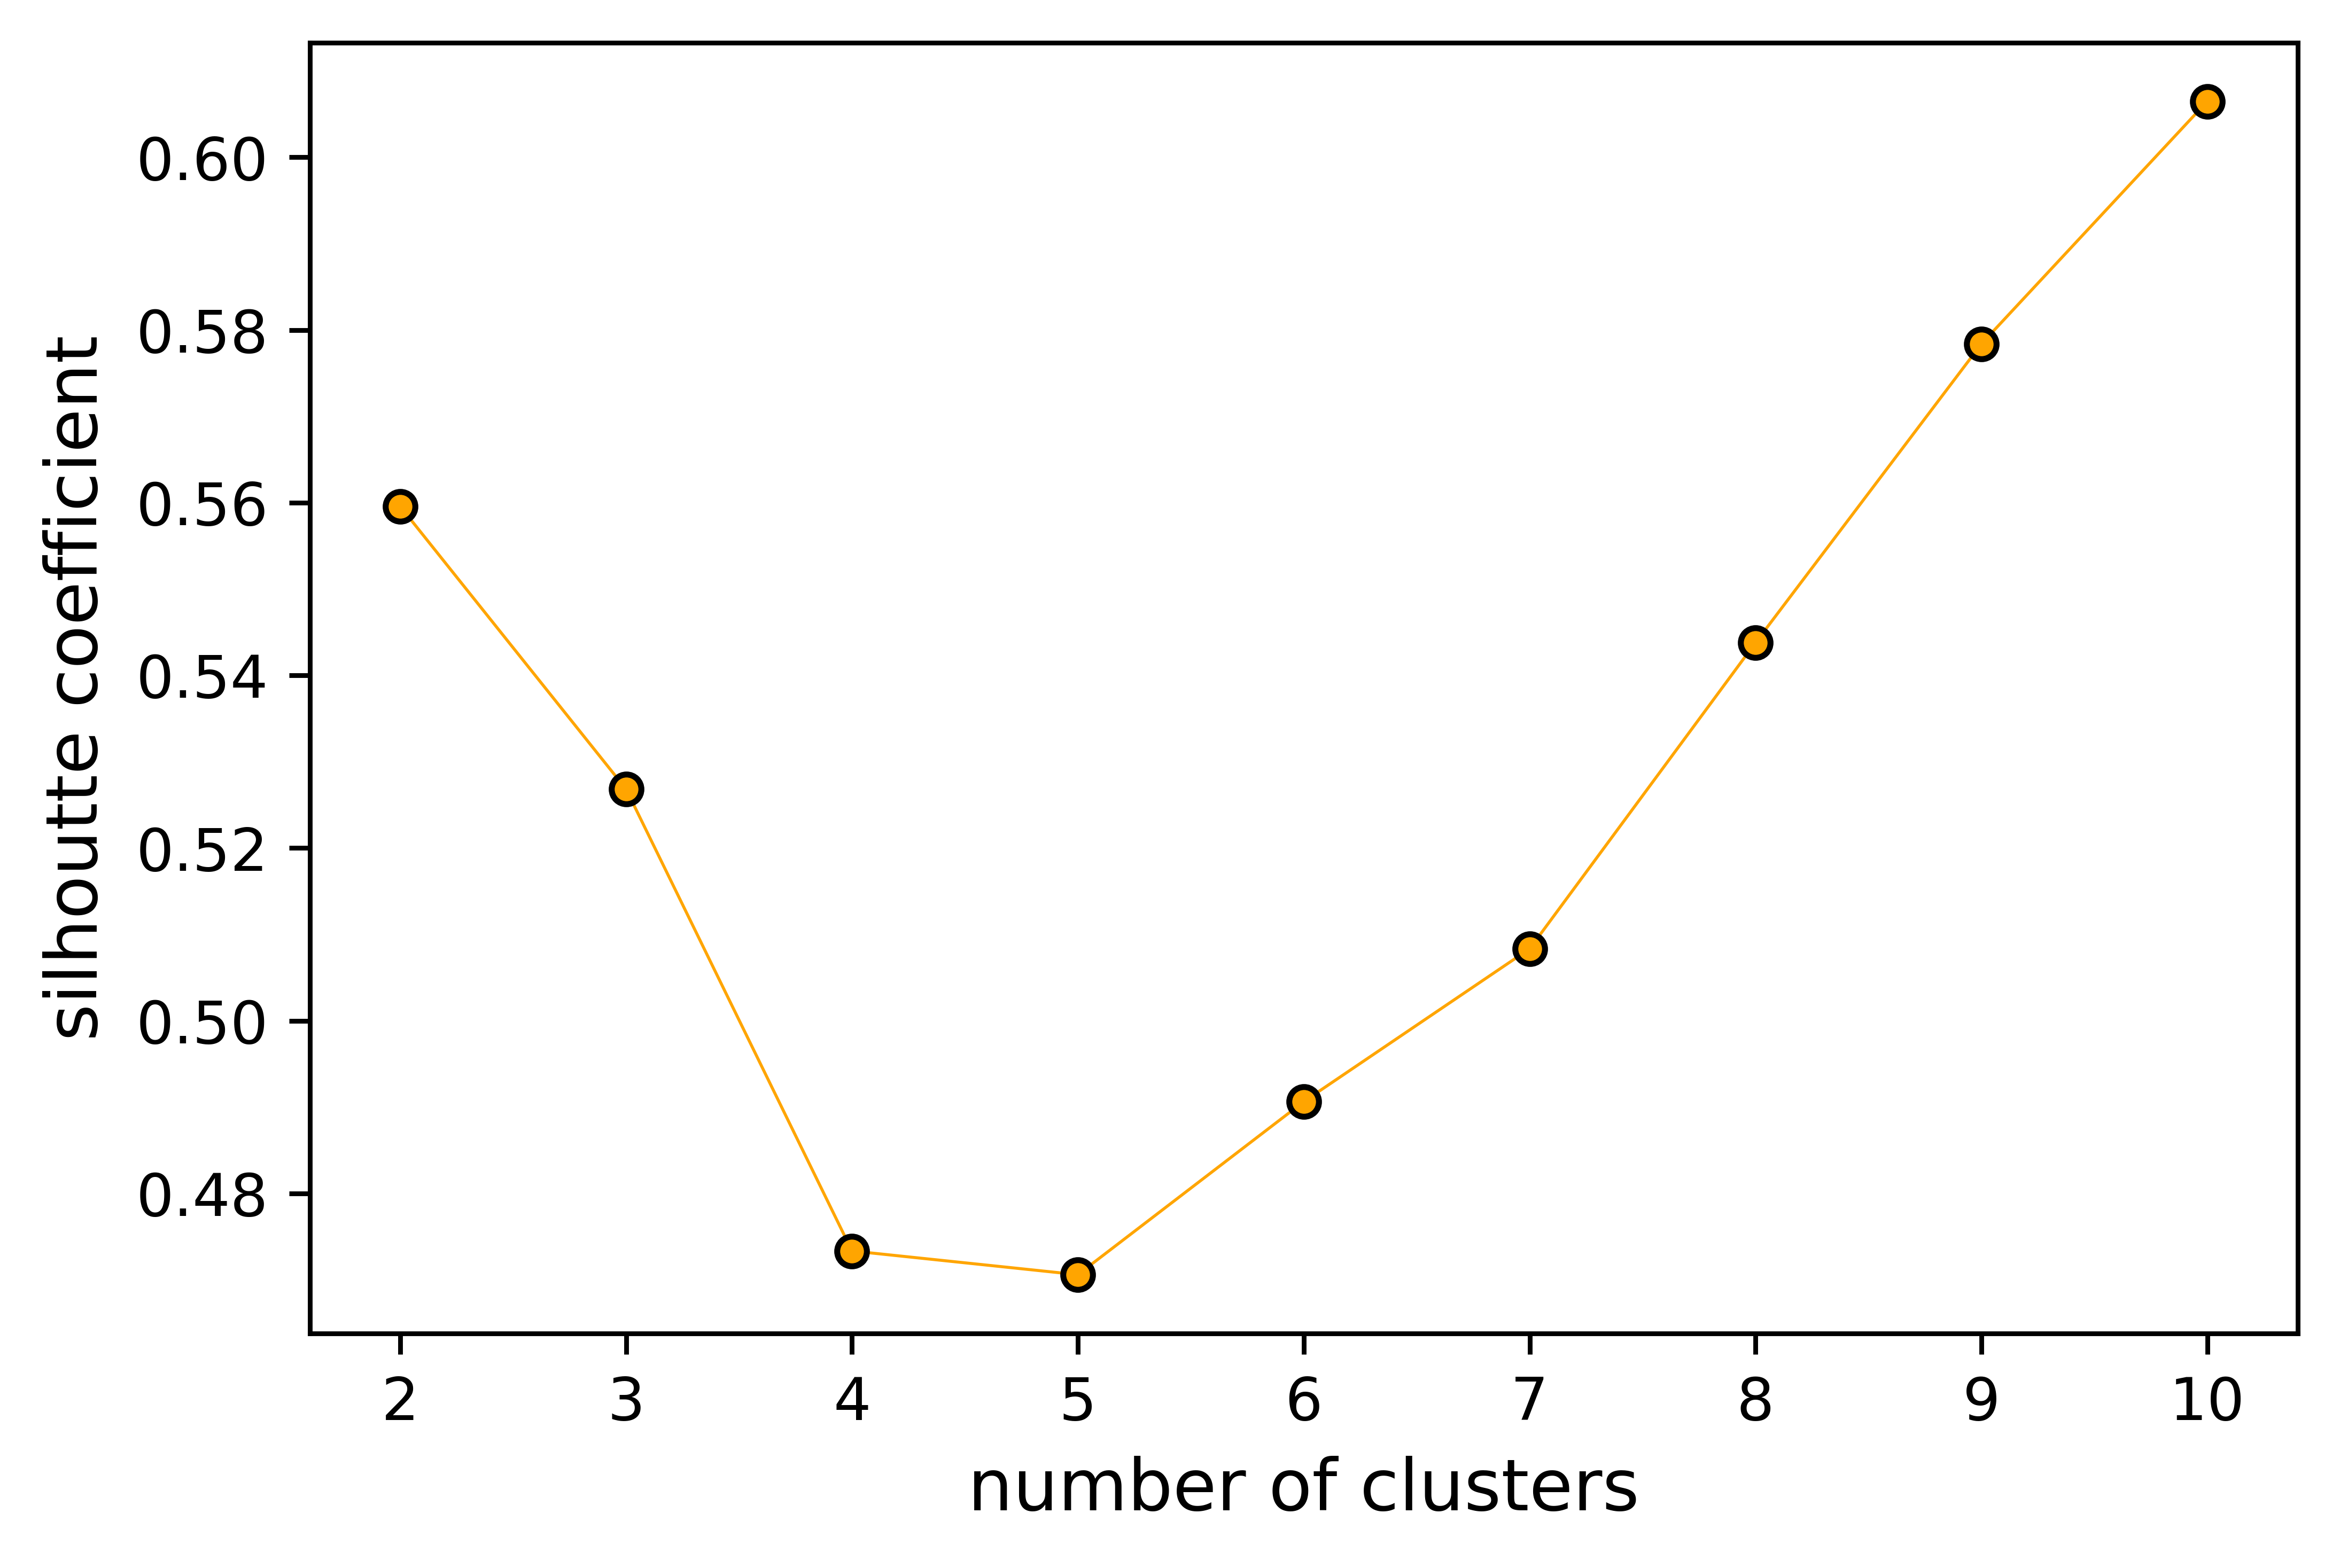

In [87]:
fig, ax = plt.subplots(dpi=800)

ax.plot(range_n_clusters, S, linewidth=0.5, marker='o',color='orange',markersize=5,markeredgecolor='k',markeredgewidth=1,fillstyle='full',clip_on=True)
plt.xlabel(r'number of clusters',fontsize=12)
plt.ylabel(r'silhoutte coefficient',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('2D/pca_evaluacion_custering.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [88]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_

In [89]:
labels

array([1, 1, 0, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 2, 1, 2, 0, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2, 0, 1, 1, 1, 2, 2,
       0, 1, 1, 1, 1, 1, 2], dtype=int32)

In [90]:
labels_dict=dict(zip(list(D.keys()),labels))

In [91]:
labels_dict

{'mapudungun': 1,
 'ancash quechua': 1,
 'cajamarca quechua': 0,
 'ecuadorian quechua': 2,
 'ayacucho quechua': 0,
 'aymara': 0,
 'jaqaru': 0,
 'chipaya': 2,
 'cholon': 2,
 'kunza': 1,
 'millcayac': 1,
 'allentiac': 2,
 'selknam': 0,
 'wichi': 1,
 'ayoreo': 2,
 'tapiete': 1,
 'tehuelche': 0,
 'secoya': 0,
 'urarina': 1,
 'yanesha': 0,
 'tariana': 1,
 'tucano': 1,
 'yauyos quechua': 0,
 'puquina': 2,
 'lule': 2,
 'vilela': 1,
 'santiago del estero quechua': 2,
 'pacaraos quechua': 0,
 'kokama': 2,
 'gaviao': 2,
 'tiriyo': 1,
 'kalapalo': 0,
 'karaja': 2,
 'apinaye': 2,
 'kashibo-kakataibo': 2,
 'matses': 1,
 'shiwilu': 1,
 'cavineã±a': 2,
 'sanuma': 0,
 'hup': 1,
 'kulina': 1,
 'bora': 1,
 'trumai': 2,
 'yurakare': 2,
 'movima': 0,
 'puinave': 1,
 'sabane': 1,
 'aguaruna': 1,
 'kwaza': 1,
 'kakua': 1,
 'moseten': 2}

In [92]:
x=list(zip(*list(X)))[0]
y=list(zip(*list(X)))[1]

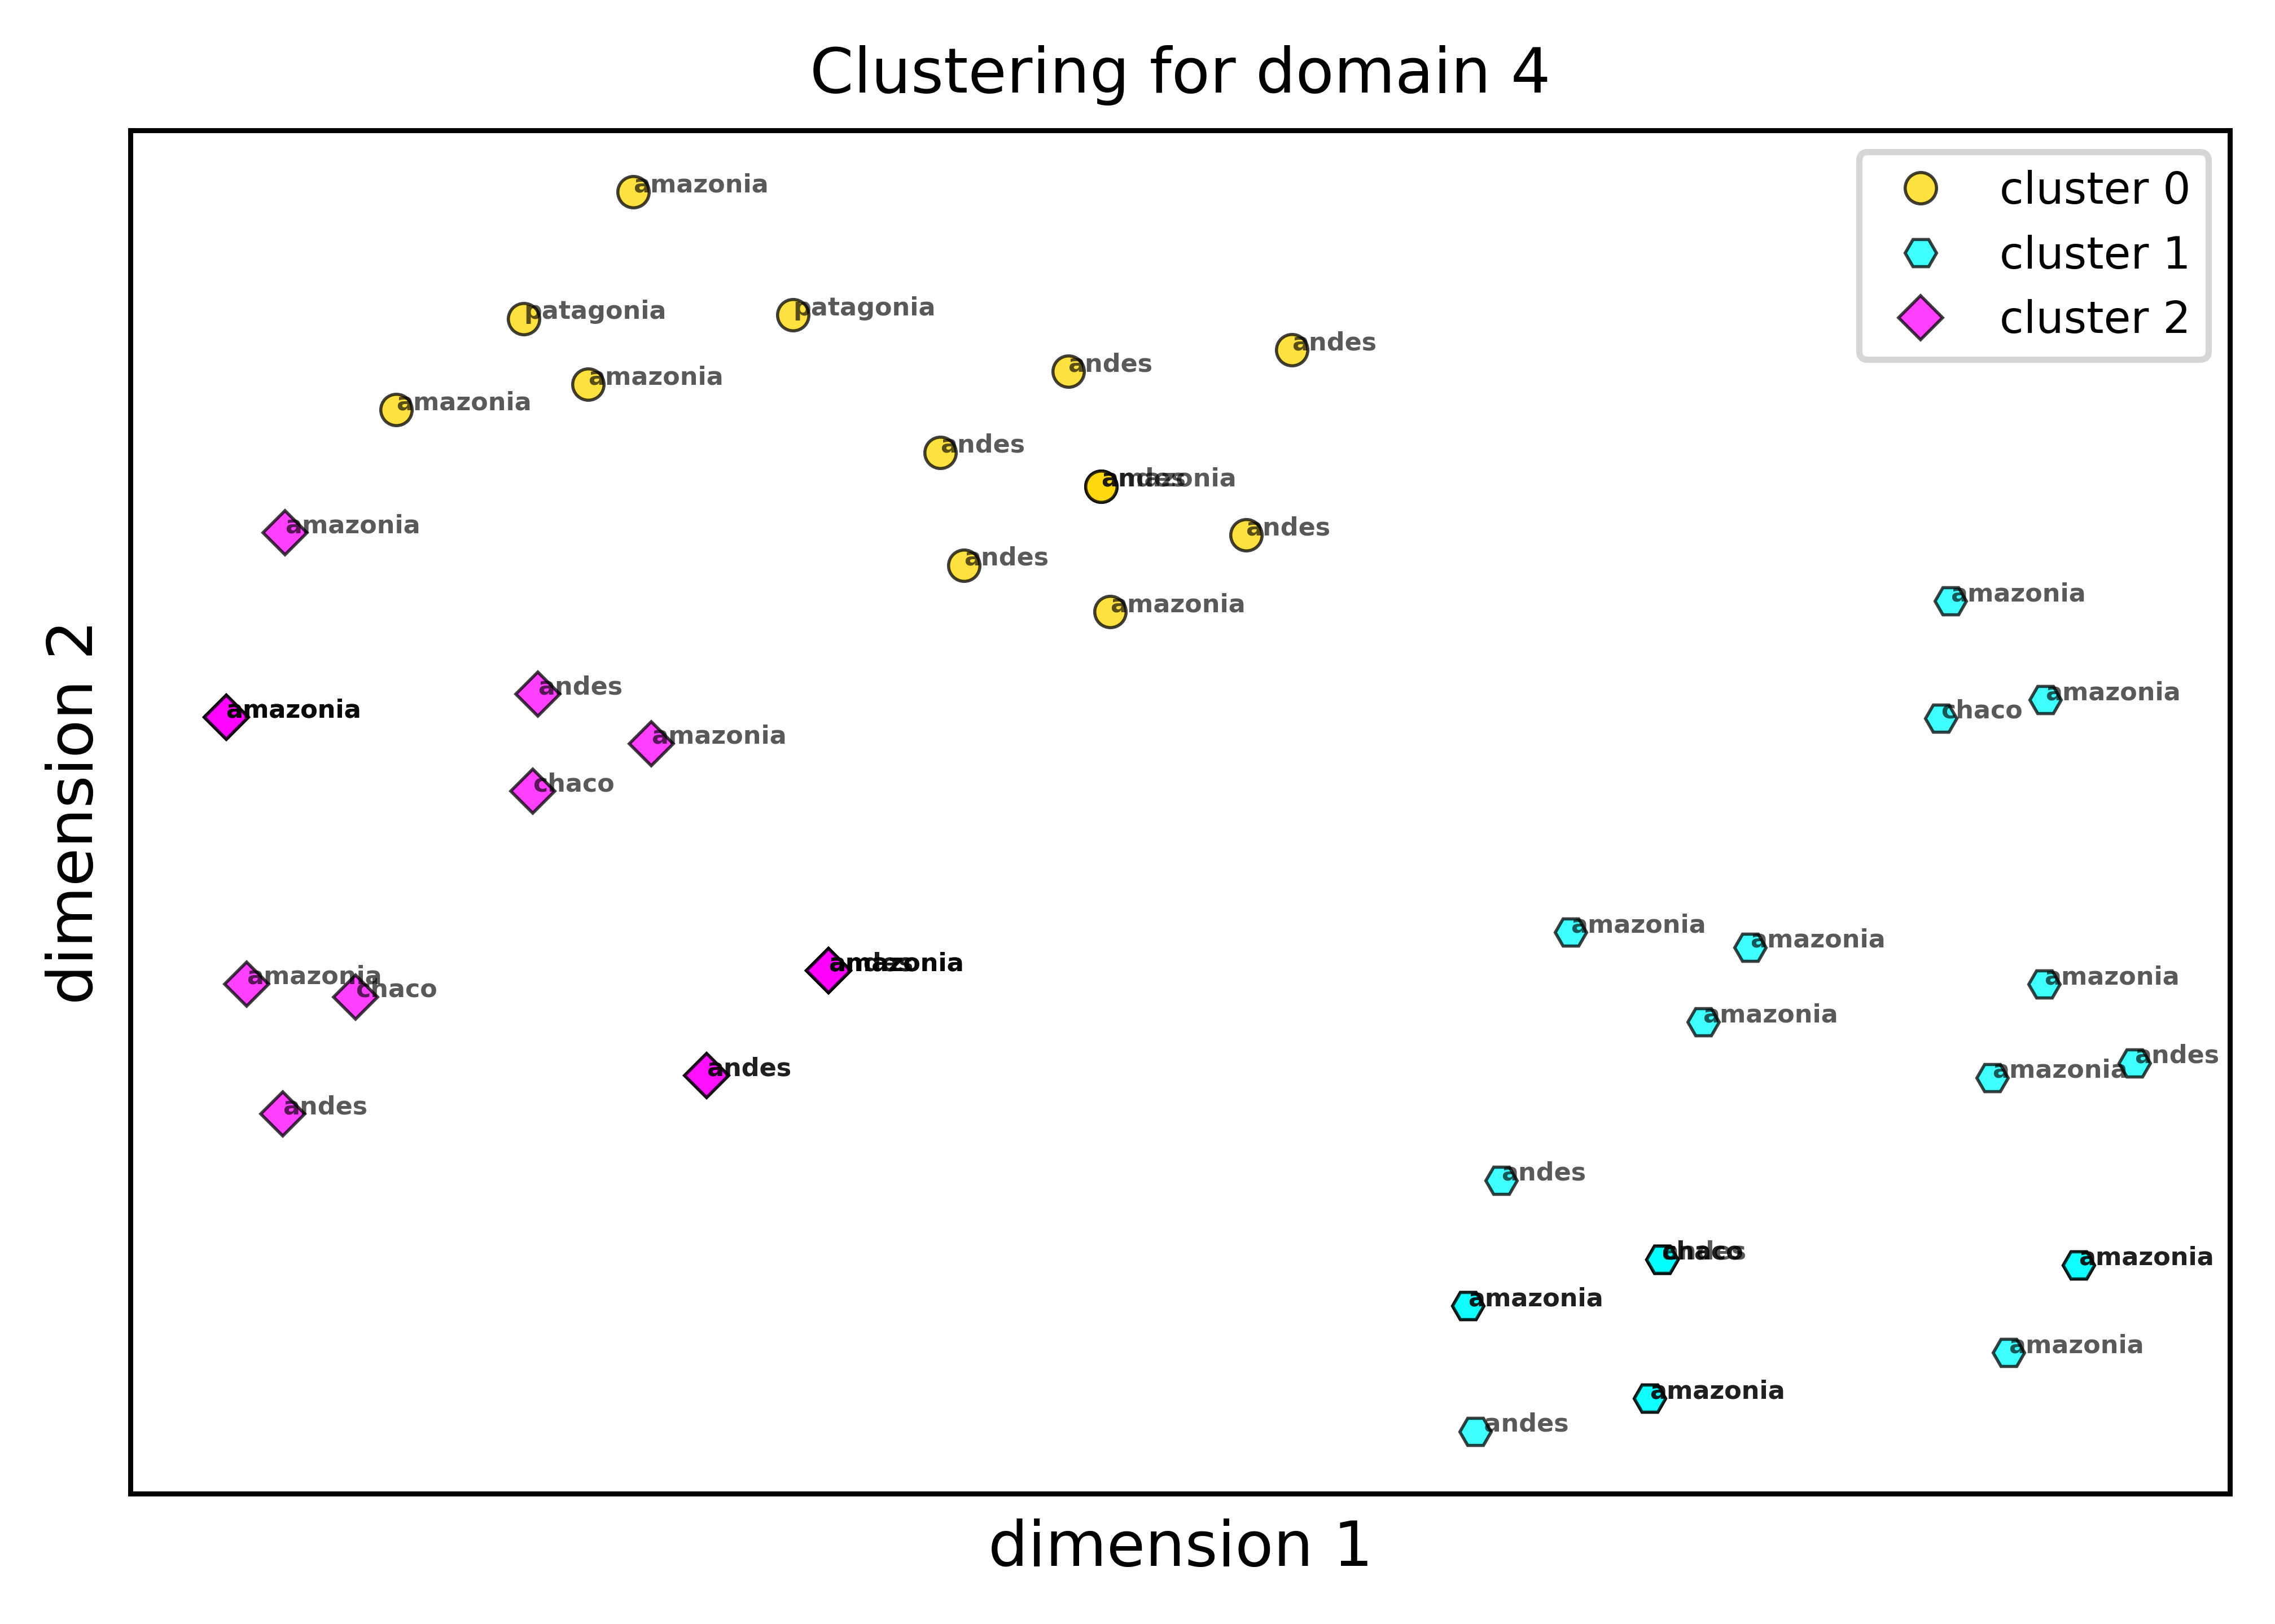

In [93]:
dominio_number=4

areas = pd.read_csv('areas.csv',sep=',')
lenguas = [name.lower() for name in list(areas['lengua'])]
areas_dict = {}
for i in list(areas.index):
    if areas.loc[i,'lengua'].lower()=='moseten':
        areas_dict['moseten']=[areas.loc[i,'sub-area'].lower(),areas.loc[i,'birchall-areas'].lower(),areas.loc[i,'birchall-east-west'].lower(),areas.loc[i,'area'].lower()]
    else:
        areas_dict[areas.loc[i,'lengua'].lower()]=[areas.loc[i,'sub-area'].lower(),areas.loc[i,'birchall-areas'].lower(),areas.loc[i,'birchall-east-west'].lower(),areas.loc[i,'area'].lower()]
    #nombres = list(D.columns)
import matplotlib.pyplot as plt

cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(dpi=800)

hipotesis = 4

for i in range(len(x)):
    if hipotesis==0:
        if list(D.keys())[i]=='cavineã±a':
            arreglo='cavineña'
            ax.annotate(areas_dict[arreglo], weight='demi', color='k', xy=(x[i],y[i]), fontsize=4, alpha=0.65)
        else:
            ax.annotate(list(D.keys())[i], weight='demi', color='k', xy=(x[i],y[i]), fontsize=4, alpha=0.65)
    else:
        if list(D.keys())[i]=='cavineã±a':
            arreglo='cavineña'
            ax.annotate(areas_dict[arreglo][hipotesis-1], weight='demi', color='k', xy=(x[i],y[i]), fontsize=4, alpha=0.65)
        else:
            ax.annotate(areas_dict[list(D.keys())[i]][hipotesis-1], weight='demi', color='k', xy=(x[i],y[i]), fontsize=4, alpha=0.65)
#    ax.annotate(labels[i], weight='demi', color='r', xy=(x[i]-1.5,y[i]-1.5), fontsize=4, alpha=0.85)

ax.plot([x[i] for i in [list(D.keys()).index(language) for language in D.keys() if labels_dict[language]==0]],[y[i] for i in [list(D.keys()).index(language) for language in D.keys() if labels_dict[language]==0]],'o',color='gold',markersize=5,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='cluster 0')
ax.plot([x[i] for i in [list(D.keys()).index(language) for language in D.keys() if labels_dict[language]==1]],[y[i] for i in [list(D.keys()).index(language) for language in D.keys() if labels_dict[language]==1]],'H',color='cyan',markersize=5,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='cluster 1')
ax.plot([x[i] for i in [list(D.keys()).index(language) for language in D.keys() if labels_dict[language]==2]],[y[i] for i in [list(D.keys()).index(language) for language in D.keys() if labels_dict[language]==2]],'D',color='fuchsia',markersize=5,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='cluster 2')

#ax.plot([x[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] in ['Mayan','Otomanguean']]],[y[i] for i in [list(L.keys()).index(language) for language in L.keys() if family[language] in ['Mayan','Otomanguean']]],'X',color='m',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True,label='Maya+Otomangue')
#ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and macroarea[glotto_iso[language]]=='South America']],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and macroarea[glotto_iso[language]]=='South America']],'H',color='orange',markersize=5,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='South America')
#ax.plot([x[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and macroarea[glotto_iso[language]]=='North America']],[y[i] for i in [list(G.nodes()).index(language) for language in G.nodes() if language in id_family.keys() and macroarea[glotto_iso[language]]=='North America']],'o',color='lime',markersize=5,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True,label='North America')

plt.grid(False)
plt.title('Clustering for domain '+str(dominio_number),fontsize=10)
ax.set_yticks([])
ax.set_xticks([])
plt.legend(loc='best',fontsize=7)
plt.ylabel(r'dimension 2',fontsize=10)
plt.xlabel(r'dimension 1',fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.savefig('hipotesis/PCAclustering_4_'+str(hipotesis)+'.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

### Arealidad de los rasgos!

In [94]:
## filter group_dict

group_dict = {n:[k for k in labels_dict.keys() if labels_dict[k] == n] for n in set(labels_dict.values())}

In [95]:
group_dict

{0: ['cajamarca quechua',
  'ayacucho quechua',
  'aymara',
  'jaqaru',
  'selknam',
  'tehuelche',
  'secoya',
  'yanesha',
  'yauyos quechua',
  'pacaraos quechua',
  'kalapalo',
  'sanuma',
  'movima'],
 1: ['mapudungun',
  'ancash quechua',
  'kunza',
  'millcayac',
  'wichi',
  'tapiete',
  'urarina',
  'tariana',
  'tucano',
  'vilela',
  'tiriyo',
  'matses',
  'shiwilu',
  'hup',
  'kulina',
  'bora',
  'puinave',
  'sabane',
  'aguaruna',
  'kwaza',
  'kakua'],
 2: ['ecuadorian quechua',
  'chipaya',
  'cholon',
  'allentiac',
  'ayoreo',
  'puquina',
  'lule',
  'santiago del estero quechua',
  'kokama',
  'gaviao',
  'karaja',
  'apinaye',
  'kashibo-kakataibo',
  'cavineã±a',
  'trumai',
  'yurakare',
  'moseten']}

In [96]:
## formato sklearn!

X = [list(D[language].values()) for language in D.keys() if language in labels_dict.keys()]
y = [labels_dict[language] for language in D.keys() if language in labels_dict.keys()]

In [97]:
X

[[1, 4, 2, 1],
 [1, 4, 2, 1],
 [2, 1, 2, 2],
 [1, 1, 2, 2],
 [2, 1, 2, 2],
 [2, 1, 1, 2],
 [2, 1, 2, 2],
 [1, 1, 1, 2],
 [1, 2, 2, 1],
 [1, 4, 2, 1],
 [2, 4, 1, 1],
 [1, 1, 2, 2],
 [2, 2, 2, 3],
 [1, 9, 1, 1],
 [1, 1, 1, 2],
 [1, 4, 2, 1],
 [2, 1, 2, 3],
 [2, 2, 1, 3],
 [1, 4, 2, 1],
 [1, 1, 1, 6],
 [2, 9, 2, 1],
 [1, 4, 2, 1],
 [2, 1, 2, 2],
 [1, 1, 2, 2],
 [1, 2, 2, 2],
 [1, 4, 2, 1],
 [1, 1, 2, 2],
 [2, 1, 2, 2],
 [1, 1, 2, 2],
 [1, 1, 2, 2],
 [2, 4, 1, 1],
 [2, 1, 2, 2],
 [1, 2, 1, 2],
 [1, 2, 1, 2],
 [2, 2, 1, 2],
 [2, 4, 2, 1],
 [1, 4, 2, 1],
 [1, 2, 2, 2],
 [2, 2, 2, 3],
 [2, 4, 1, 1],
 [1, 4, 1, 1],
 [1, 9, 2, 5],
 [1, 2, 1, 2],
 [1, 1, 2, 2],
 [2, 1, 2, 2],
 [2, 3, 2, 1],
 [1, 4, 1, 1],
 [1, 4, 2, 1],
 [1, 4, 1, 1],
 [2, 4, 2, 1],
 [1, 1, 1, 2]]

In [98]:
y

[1,
 1,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 2]

#### manera 1: trees!

In [99]:
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,random_state=0)

In [100]:
forest.fit(X, y)
importances = dict(zip(D[list(D.keys())[0]].keys(),forest.feature_importances_))

In [101]:
## ordenamos los rasgos de mayor a menor importancia!

importances = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1],reverse=True)}

In [102]:
importances

{'4_2': 0.37483447523695873,
 '4_1': 0.35493644254002427,
 '4_3': 0.25254188499147523,
 '4_4': 0.017687197231541777}

#### manera 2: kbest!

In [103]:
from sklearn.feature_selection import SelectKBest, chi2
kbest = SelectKBest(chi2, k='all').fit(X, y)

In [104]:
importances = dict(zip(D[list(D.keys())[0]].keys(),kbest.scores_))

In [105]:
## ordenamos los rasgos de mayor a menor importancia!

importances = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1],reverse=True)}

In [106]:
importances

{'4_2': 50.81382385730212,
 '4_1': 9.303631151457243,
 '4_3': 4.041170097508125,
 '4_4': 0.14479638009049794}